# 📊 Desafio "Dados que Transformam" – Olist (ETL + Análise Exploratória)
**Candidato:** Rayane Neves Lira  
**Objetivo:** Realizar um pipeline completo de ETL (Extração, Transformação e Carga) e uma análise exploratória a partir de dados públicos da Olist, com foco em insights para áreas como vendas, logística, satisfação do cliente, finanças e marketing.

# Importação das bibliotecas

In [ ]:
# Bibliotecas principais
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações gerais
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

print("Bibliotecas importadas com sucesso.")

Bibliotecas importadas com sucesso.


## 1. Extração de Dados

Nesta etapa realizamos a leitura e validação dos datasets originais fornecidos pela Olist. São eles:

- Informações de clientes
- Geolocalização
- Itens de pedidos
- Pagamentos
- Avaliações
- Pedidos
- Produtos
- Vendedores
- Tradução de categorias


In [ ]:
# Leitura dos datasets
df_customers = pd.read_csv('olist_customers_dataset.csv')
df_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
df_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_order_payments = pd.read_csv('olist_order_payments_dataset.csv')
df_order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_sellers = pd.read_csv('olist_sellers_dataset.csv')
df_category_translation = pd.read_csv('product_category_name_translation.csv')

print("Todos os datasets foram carregados com sucesso!")


Todos os datasets foram carregados com sucesso!


### 1.1. Inspeção Inicial dos Datasets

Após carregar os dados, o próximo passo é realizar uma inspeção inicial em cada um dos DataFrames. Esta análise preliminar é fundamental para entendermos a estrutura, a volumetria e a qualidade dos dados brutos.

Vamos verificar os seguintes pontos para cada dataset:
- **As primeiras linhas (`.head()`):** Para ter uma amostra visual dos dados.
- **Informações gerais (`.info()`):** Para entender os tipos de dados de cada coluna e a contagem de registros não nulos.
- **Valores ausentes (`.isnull().sum()`):** Para quantificar a quantidade de dados faltantes em cada coluna, um ponto crucial para a etapa de limpeza.

In [ ]:
# Criando um dicionário para armazenar os dataframes e seus nomes
datasets = {
    "Clientes": df_customers,
    "Geolocalização": df_geolocation,
    "Itens dos Pedidos": df_order_items,
    "Pagamentos dos Pedidos": df_order_payments,
    "Avaliações dos Pedidos": df_order_reviews,
    "Pedidos": df_orders,
    "Produtos": df_products,
    "Vendedores": df_sellers,
    "Tradução das Categorias": df_category_translation
}

# Iterando sobre cada dataset para realizar a inspeção inicial
for nome, df in datasets.items():
    print(f"=======================================================================")
    print(f"INSPEÇÃO DO DATASET: {nome}")
    print(f"=======================================================================")

    # Mostrando as 5 primeiras linhas
    print("\n--- 1. Amostra dos Dados (Head) ---")
    display(df.head())

    # Mostrando informações gerais do DataFrame
    print(f"\n--- 2. Informações Gerais (Info) ---")
    df.info()

    # Verificando a quantidade de valores nulos por coluna
    print("\n--- 3. Contagem de Valores Nulos (Isnull) ---")
    print(df.isnull().sum())

    print("\n\n")

INSPEÇÃO DO DATASET: Clientes

--- 1. Amostra dos Dados (Head) ---


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



--- 2. Informações Gerais (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

--- 3. Contagem de Valores Nulos (Isnull) ---
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64



INSPEÇÃO DO DATASET: Geolocalização

--- 1. Amostra dos Dados (Head) ---


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP



--- 2. Informações Gerais (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

--- 3. Contagem de Valores Nulos (Isnull) ---
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64



INSPEÇÃO DO DATASET: Itens dos Pedidos

--- 1. Amostra dos Dados (Head) ---


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



--- 2. Informações Gerais (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

--- 3. Contagem de Valores Nulos (Isnull) ---
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64



INSPEÇÃO DO DATASET: Pagamentos dos Pedidos

--- 1. Amostra dos Dados (Head) ---


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



--- 2. Informações Gerais (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

--- 3. Contagem de Valores Nulos (Isnull) ---
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64



INSPEÇÃO DO DATASET: Avaliações dos Pedidos

--- 1. Amostra dos Dados (Head) ---


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



--- 2. Informações Gerais (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB

--- 3. Contagem de Valores Nulos (Isnull) ---
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64



INSPEÇÃO DO DATASET: Pedidos

---

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



--- 2. Informações Gerais (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

--- 3. Contagem de Valores Nulos (Isnull) ---
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at        

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



--- 2. Informações Gerais (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

--- 3. Contagem de Valores Nulos (Isnull) ---
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP



--- 2. Informações Gerais (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

--- 3. Contagem de Valores Nulos (Isnull) ---
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64



INSPEÇÃO DO DATASET: Tradução das Categorias

--- 1. Amostra dos Dados (Head) ---


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor



--- 2. Informações Gerais (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

--- 3. Contagem de Valores Nulos (Isnull) ---
product_category_name            0
product_category_name_english    0
dtype: int64





#2. Transformação dos Dados
Com base na inspeção inicial, identificamos pontos cruciais que precisam de tratamento antes de prosseguirmos para a análise. Esta etapa de transformação (o "T" do ETL) é onde vamos limpar, corrigir e enriquecer nossos dados, preparando-os para se tornarem informações valiosas.

In [ ]:
# 2.2. Tratamento de Valores Ausentes

# --- Tratamento do DataFrame de Avaliações (df_order_reviews) ---
print("--- Tratando o DataFrame de Avaliações ---")
# Correção para evitar o FutureWarning: reatribuindo o valor em vez de usar inplace=True
df_order_reviews['review_comment_title'] = df_order_reviews['review_comment_title'].fillna('Sem Título')
df_order_reviews['review_comment_message'] = df_order_reviews['review_comment_message'].fillna('Sem Comentário')
print("Valores nulos em 'review_comment_title' e 'review_comment_message' foram preenchidos.\n")


# --- Tratamento do DataFrame de Produtos (df_products) ---
print("--- Tratando o DataFrame de Produtos ---")
# Correção para evitar o FutureWarning: reatribuindo o valor
df_products['product_category_name'] = df_products['product_category_name'].fillna('desconhecida')
print("Valores nulos em 'product_category_name' foram preenchidos com 'desconhecida'.")

# Preenchendo as colunas de comprimento e quantidade com 0
lenght_cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
df_products[lenght_cols] = df_products[lenght_cols].fillna(0)
print("Valores nulos nas colunas de comprimento e quantidade foram preenchidos com 0.")

# Preenchendo as colunas de dimensão e peso com a mediana
dimension_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in dimension_cols:
    median_value = df_products[col].median()
    # Correção para evitar o FutureWarning: reatribuindo o valor
    df_products[col] = df_products[col].fillna(median_value)
print("Valores nulos nas colunas de dimensão e peso foram preenchidos com a mediana.\n")


# --- Verificação Final ---
print("--- Verificação dos valores nulos após o tratamento ---\n")

print("Valores nulos no DataFrame de Avaliações:")
print(df_order_reviews.isnull().sum())
print("\n" + "="*50 + "\n")

print("Valores nulos no DataFrame de Produtos:")
print(df_products.isnull().sum())
print("\n" + "="*50 + "\n")

print("Valores nulos no DataFrame de Pedidos (verificando que permanecem inalterados):")
print(df_orders.isnull().sum())



--- Tratando o DataFrame de Avaliações ---
Valores nulos em 'review_comment_title' e 'review_comment_message' foram preenchidos.

--- Tratando o DataFrame de Produtos ---
Valores nulos em 'product_category_name' foram preenchidos com 'desconhecida'.
Valores nulos nas colunas de comprimento e quantidade foram preenchidos com 0.
Valores nulos nas colunas de dimensão e peso foram preenchidos com a mediana.

--- Verificação dos valores nulos após o tratamento ---

Valores nulos no DataFrame de Avaliações:
review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


Valores nulos no DataFrame de Produtos:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_hei

Unificação e Enriquecimento dos Dados (Merge)
Com os datasets limpos individualmente, o próximo passo é combiná-los. Vamos criar um DataFrame principal que centralize todas as informações relevantes para a análise. A estratégia será unir as tabelas usando a coluna order_id como chave principal, e outras chaves como product_id e customer_id conforme necessário.

O processo de unificação seguirá a lógica do diagrama de entidade-relacionamento fornecido:

Começaremos com a tabela de pedidos (df_orders) como nossa base.

Adicionaremos as informações dos itens do pedido (df_order_items).

Incluiremos os dados de pagamentos (df_order_payments).

Agregaremos as avaliações (df_order_reviews).

Uniremos os dados dos produtos (df_products).

Adicionaremos as informações dos clientes (df_customers).

Incluiremos os dados dos vendedores (df_sellers).

Finalmente, usaremos a tabela de tradução (df_category_translation) para enriquecer nosso dataset com os nomes das categorias em inglês.

Ao final, teremos um único DataFrame, pronto para a etapa de análise exploratória.

In [ ]:
# 2.3. Unificação dos DataFrames

print("--- Iniciando a unificação dos DataFrames ---")

# O DataFrame de geolocalização é muito grande e tem múltiplos registros para o mesmo CEP.
# Vamos criar uma versão simplificada dele, com a média da lat/lon por CEP para otimizar.
print("Tratando o DataFrame de Geolocalização...")
df_geolocation_simplified = df_geolocation.groupby('geolocation_zip_code_prefix').agg(
    geolocation_lat=('geolocation_lat', 'mean'),
    geolocation_lng=('geolocation_lng', 'mean')
).reset_index()


# Unindo todos os DataFrames em um único DataFrame consolidado
# Usaremos 'left' merge para garantir que todos os pedidos da tabela 'df_orders' sejam mantidos.

# Passo 1: Unir pedidos e itens
df_merged = pd.merge(df_orders, df_order_items, on='order_id', how='left')

# Passo 2: Adicionar pagamentos
df_merged = pd.merge(df_merged, df_order_payments, on='order_id', how='left')

# Passo 3: Adicionar avaliações
df_merged = pd.merge(df_merged, df_order_reviews, on='order_id', how='left')

# Passo 4: Adicionar produtos
df_merged = pd.merge(df_merged, df_products, on='product_id', how='left')

# Passo 5: Adicionar clientes
df_merged = pd.merge(df_merged, df_customers, on='customer_id', how='left')

# Passo 6: Adicionar vendedores
df_merged = pd.merge(df_merged, df_sellers, on='seller_id', how='left')

# Passo 7: Adicionar tradução das categorias
df_merged = pd.merge(df_merged, df_category_translation, on='product_category_name', how='left')


print("\n--- Unificação concluída com sucesso! ---")

# Verificando o resultado da unificação
print("\n--- Amostra do DataFrame Unificado (Head) ---")
display(df_merged.head())

print("\n--- Informações Gerais do DataFrame Unificado (Info) ---")
df_merged.info()



--- Iniciando a unificação dos DataFrames ---
Tratando o DataFrame de Geolocalização...

--- Unificação concluída com sucesso! ---

--- Amostra do DataFrame Unificado (Head) ---


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350.0,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570.0,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840.0,guariba,SP,auto



--- Informações Gerais do DataFrame Unificado (Info) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119143 non-null  object        
 1   customer_id                    119143 non-null  object        
 2   order_status                   119143 non-null  object        
 3   order_purchase_timestamp       119143 non-null  datetime64[ns]
 4   order_approved_at              118966 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 6   order_delivered_customer_date  115722 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119143 non-null  datetime64[ns]
 8   order_item_id                  118310 non-null  float64       
 9   product_id                     118310 non-null  object        
 10  seller_id 

#Carregamento dos Resultados (Load)
Esta é a etapa final do nosso pipeline de ETL. Após extrair, limpar, transformar e unificar os dados, vamos agora carregá-los em um novo arquivo.

Salvaremos o DataFrame consolidado (df_merged) em um arquivo CSV chamado olist_master_dataset.csv. Este arquivo será a nossa "fonte da verdade" para toda a fase de Análise Exploratória, garantindo que não precisaremos refazer os passos de ETL a cada vez que formos explorar uma nova questão de negócio.

In [ ]:
# 3.1. Salvando e Verificando o DataFrame Consolidado

# --- 1. Carregamento (Salvando o arquivo) ---

# Definindo o nome do arquivo de saída
output_file = 'olist_master_dataset.csv'

print(f"--- Iniciando o salvamento em '{output_file}' ---")

# Usando to_csv para salvar o DataFrame.
# O parâmetro 'index=False' é crucial para evitar que o índice do pandas seja salvo como uma coluna indesejada.
df_merged.to_csv(output_file, index=False, encoding='utf-8')

print(f"Arquivo '{output_file}' salvo com sucesso!")


# --- 2. Verificação (Lendo o arquivo de volta) ---

print(f"\n--- Iniciando a verificação do arquivo salvo ---")

try:
    # Lendo o arquivo que acabamos de salvar para um novo DataFrame
    df_loaded = pd.read_csv(output_file)
    print("Arquivo lido de volta com sucesso.")

    # Comparando as dimensões (shape) dos DataFrames
    print(f"Shape do DataFrame original (df_merged): {df_merged.shape}")
    print(f"Shape do DataFrame carregado (df_loaded):  {df_loaded.shape}")

    # Verificando se as dimensões são idênticas
    if df_merged.shape == df_loaded.shape:
        print("\nVERIFICAÇÃO CONCLUÍDA: O arquivo salvo é uma cópia fiel do DataFrame original.")
        print("O pipeline de ETL foi concluído com sucesso e os dados estão prontos para análise!")
    else:
        print("\nATENÇÃO: As dimensões do arquivo salvo não correspondem ao DataFrame original. Pode ter ocorrido um erro.")

except FileNotFoundError:
    print(f"\nERRO: O arquivo '{output_file}' não foi encontrado. Ocorreu um problema durante o salvamento.")



--- Iniciando o salvamento em 'olist_master_dataset.csv' ---
Arquivo 'olist_master_dataset.csv' salvo com sucesso!

--- Iniciando a verificação do arquivo salvo ---
Arquivo lido de volta com sucesso.
Shape do DataFrame original (df_merged): (119143, 40)
Shape do DataFrame carregado (df_loaded):  (119143, 40)

VERIFICAÇÃO CONCLUÍDA: O arquivo salvo é uma cópia fiel do DataFrame original.
O pipeline de ETL foi concluído com sucesso e os dados estão prontos para análise!


# Análise de Performance de Vendas

#Volumes por categoria
Nesta seção, vamos investigar a questão: "Quais categorias de produtos têm o maior volume de vendas e em quais períodos (mensal, trimestral)?"

Para responder a esta pergunta, nossa análise será dividida em três partes:

Análise Geral de Volume: Identificaremos as categorias de produtos mais vendidas no geral, visualizando o top 15 em um gráfico de barras para entendermos quem são os líderes de mercado.

Análise de Volume Mensal: Criaremos um gráfico de linhas para acompanhar a evolução das vendas mensais das 5 categorias principais. Isso nos ajudará a identificar picos e vales de demanda para cada uma delas.

Análise de Volume Trimestral: Faremos uma análise similar, mas agrupando os dados por trimestre, para observar tendências de médio prazo e padrões sazonais de forma mais suavizada.

Vamos começar carregando nosso dataset mestre e preparando os dados para a análise.

Dataset mestre 'olist_master_dataset.csv' carregado com sucesso!

--- 1. Análise Geral de Volume por Categoria ---


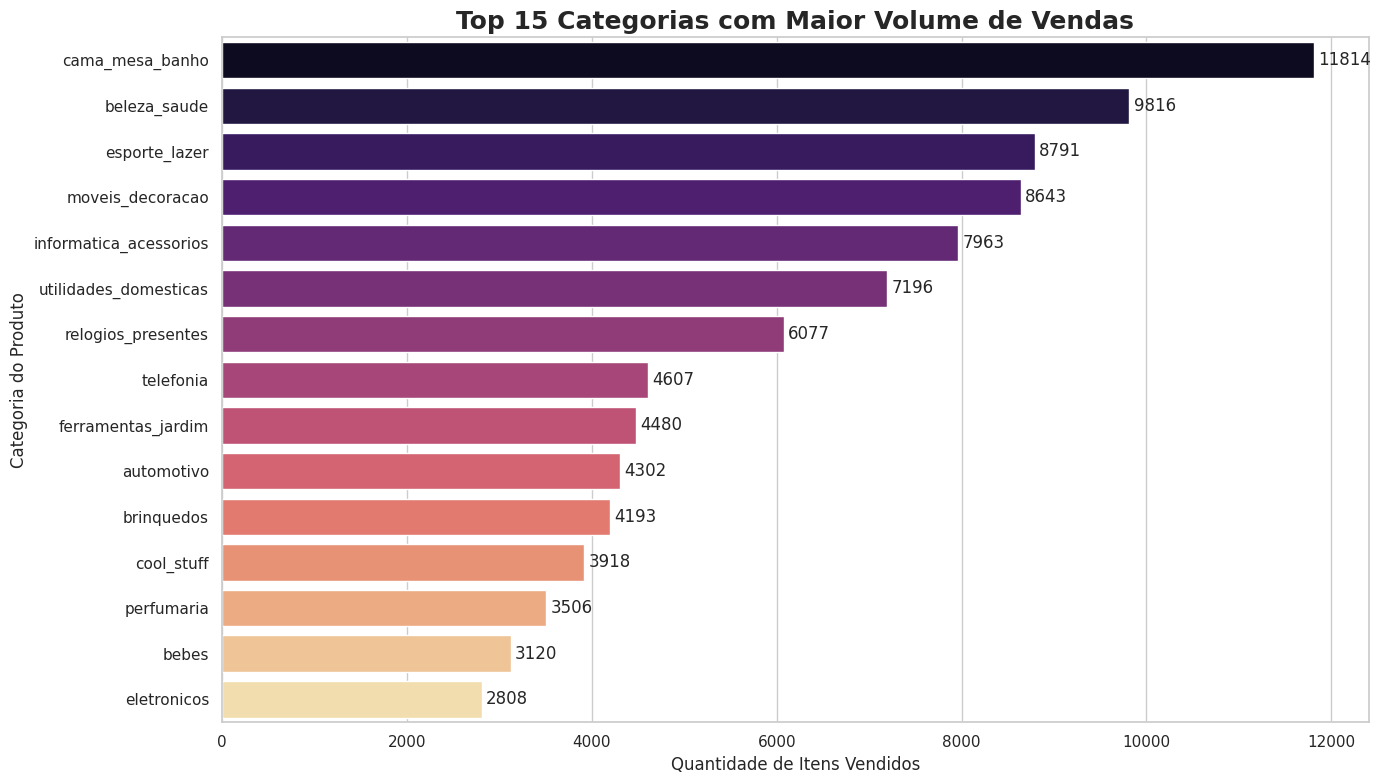


--- 2. Análise de Volume Mensal (Top 5 Categorias) ---


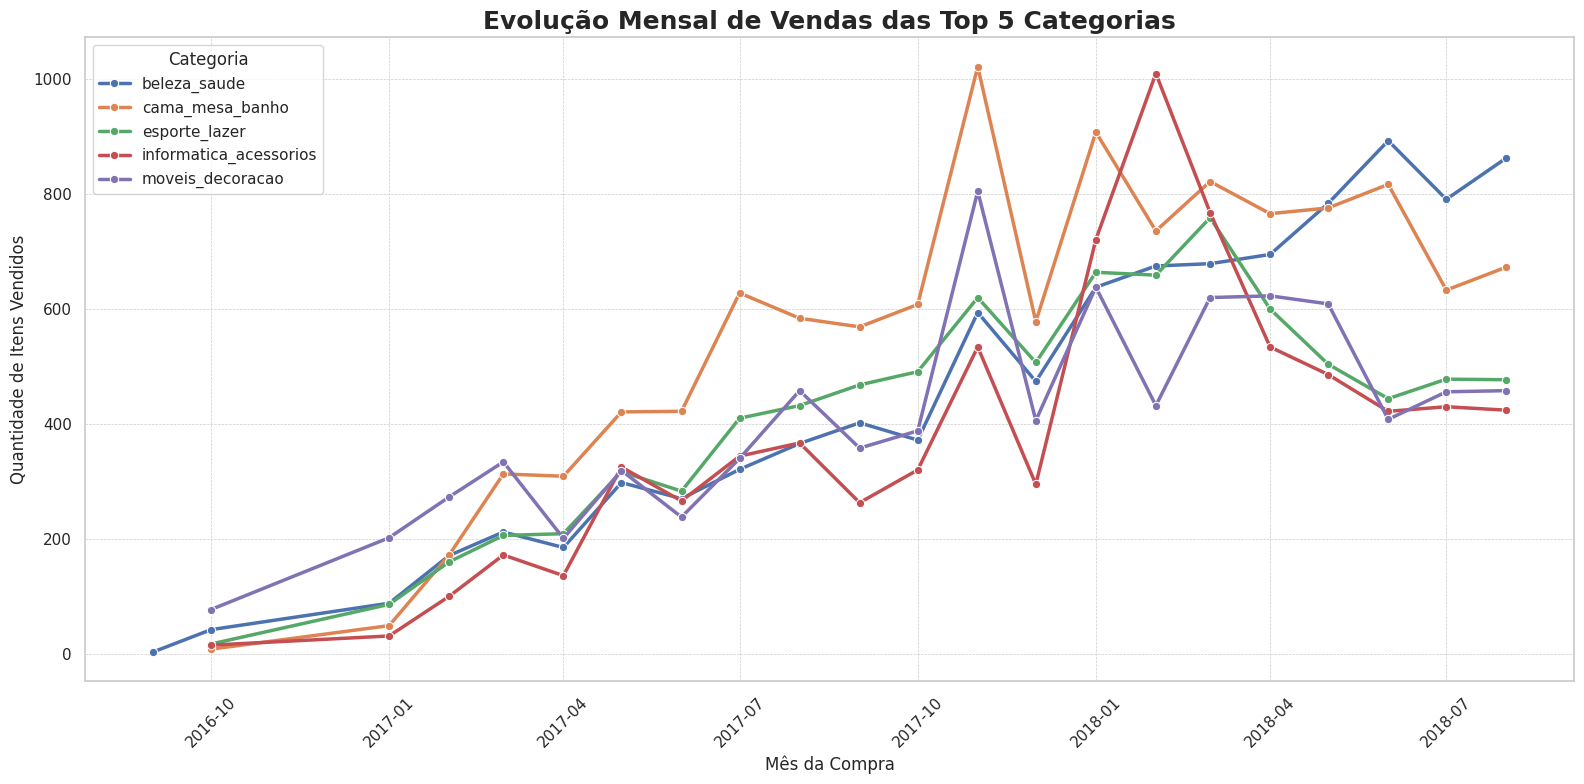


--- 3. Análise de Volume Trimestral (Top 5 Categorias) ---


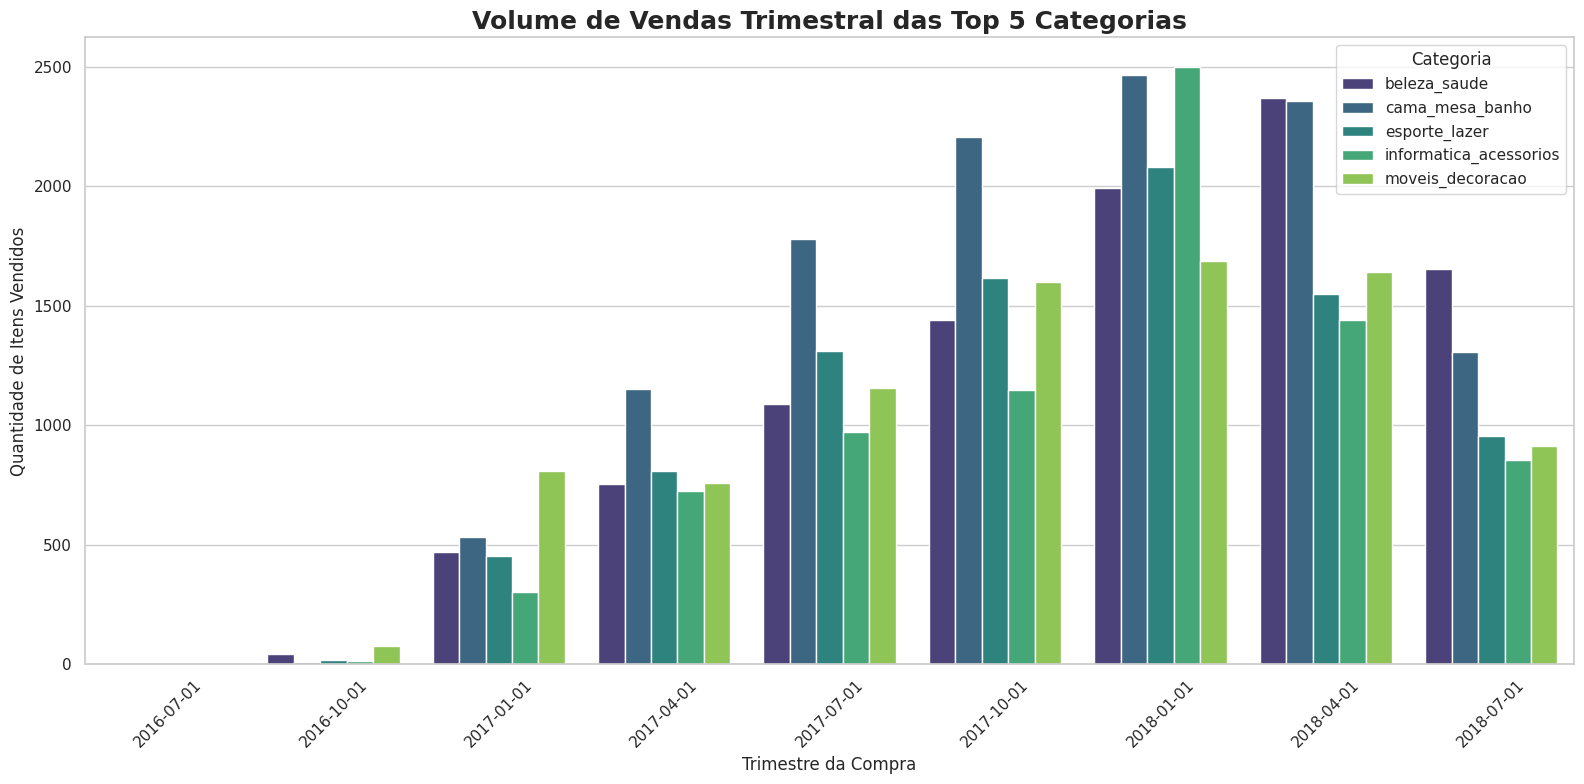

In [ ]:
# Importando as bibliotecas (caso o notebook tenha sido reiniciado)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações gerais de visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Carregando o nosso dataset mestre, já tratado
try:
    df = pd.read_csv('olist_master_dataset.csv')
    print("Dataset mestre 'olist_master_dataset.csv' carregado com sucesso!")
except FileNotFoundError:
    print("ERRO: O arquivo 'olist_master_dataset.csv' não foi encontrado. Por favor, execute o pipeline de ETL primeiro.")
    # Interrompe a execução se o arquivo não existir
    df = pd.DataFrame()

if not df.empty:
    # Convertendo a coluna de data para o formato datetime (garantia de qualidade)
    df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

    # Para uma análise de vendas, vamos considerar apenas os pedidos que foram entregues ('delivered')
    # Isso evita contar pedidos cancelados ou que não foram concluídos.
    df_vendas = df[df['order_status'] == 'delivered'].copy()

    # Lidando com possíveis categorias nulas que sobraram após o merge (usando a coluna em português)
    df_vendas['product_category_name'] = df_vendas['product_category_name'].fillna('desconhecida')


    # --- 1. Análise Geral de Volume por Categoria ---
    print("\n--- 1. Análise Geral de Volume por Categoria ---")

    # Contando o número de itens vendidos por categoria (usando a coluna em português)
    volume_por_categoria = df_vendas['product_category_name'].value_counts().nlargest(15)

    plt.figure(figsize=(14, 8))
    ax = sns.barplot(x=volume_por_categoria.values, y=volume_por_categoria.index, palette='magma', hue=volume_por_categoria.index, legend=False)

    ax.set_title('Top 15 Categorias com Maior Volume de Vendas', fontsize=18, fontweight='bold')
    ax.set_xlabel('Quantidade de Itens Vendidos', fontsize=12)
    ax.set_ylabel('Categoria do Produto', fontsize=12)

    # Adicionando os valores nas barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', padding=3)

    plt.tight_layout()
    plt.show()


    # --- 2. Análise de Volume Mensal (Top 5 Categorias) ---
    print("\n--- 2. Análise de Volume Mensal (Top 5 Categorias) ---")

    # Criando uma coluna de Ano-Mês
    df_vendas['ano_mes'] = df_vendas['order_purchase_timestamp'].dt.to_period('M')

    # Pegando o nome das 5 categorias mais vendidas
    top_5_categorias = volume_por_categoria.nlargest(5).index

    # Filtrando o DataFrame para conter apenas as top 5 categorias (usando a coluna em português)
    df_top5_mensal = df_vendas[df_vendas['product_category_name'].isin(top_5_categorias)]

    # Agrupando por mês e categoria para contar o volume (usando a coluna em português)
    volume_mensal_top5 = df_top5_mensal.groupby(['ano_mes', 'product_category_name']).size().reset_index(name='volume')

    # Convertendo 'ano_mes' para timestamp para plotagem
    volume_mensal_top5['ano_mes'] = volume_mensal_top5['ano_mes'].dt.to_timestamp()

    plt.figure(figsize=(16, 8))
    sns.lineplot(data=volume_mensal_top5, x='ano_mes', y='volume', hue='product_category_name', marker='o', linewidth=2.5)

    plt.title('Evolução Mensal de Vendas das Top 5 Categorias', fontsize=18, fontweight='bold')
    plt.xlabel('Mês da Compra', fontsize=12)
    plt.ylabel('Quantidade de Itens Vendidos', fontsize=12)
    plt.legend(title='Categoria')
    plt.xticks(rotation=45)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


    # --- 3. Análise de Volume Trimestral (Top 5 Categorias) ---
    print("\n--- 3. Análise de Volume Trimestral (Top 5 Categorias) ---")

    # Criando uma coluna de Ano-Trimestre
    df_vendas['ano_trimestre'] = df_vendas['order_purchase_timestamp'].dt.to_period('Q')

    # Filtrando o DataFrame para conter apenas as top 5 categorias (usando a coluna em português)
    df_top5_trimestral = df_vendas[df_vendas['product_category_name'].isin(top_5_categorias)]

    # Agrupando por trimestre e categoria para contar o volume (usando a coluna em português)
    volume_trimestral_top5 = df_top5_trimestral.groupby(['ano_trimestre', 'product_category_name']).size().reset_index(name='volume')

    # Convertendo 'ano_trimestre' para timestamp para plotagem
    volume_trimestral_top5['ano_trimestre'] = volume_trimestral_top5['ano_trimestre'].dt.to_timestamp()

    plt.figure(figsize=(16, 8))
    ax = sns.barplot(data=volume_trimestral_top5, x='ano_trimestre', y='volume', hue='product_category_name', palette='viridis')

    plt.title('Volume de Vendas Trimestral das Top 5 Categorias', fontsize=18, fontweight='bold')
    plt.xlabel('Trimestre da Compra', fontsize=12)
    plt.ylabel('Quantidade de Itens Vendidos', fontsize=12)
    plt.legend(title='Categoria')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


#Análise de Logística
Desempenho por Vendedor (Proxy para Transportadora)
Nesta seção, vamos investigar a questão: "Avaliar o desempenho de diferentes transportadoras com base no tempo de entrega e na satisfação do cliente", utilizando o seller_id como representante do desempenho logístico.

--- 1. Criando métricas de logística ---
Métricas 'tempo_entrega_real' e 'diferenca_entrega' criadas.

--- 2. Agregando dados por vendedor ---
Dados agregados com sucesso, incluindo a localização do vendedor.

Analisando 413 vendedores com mais de 50 vendas.


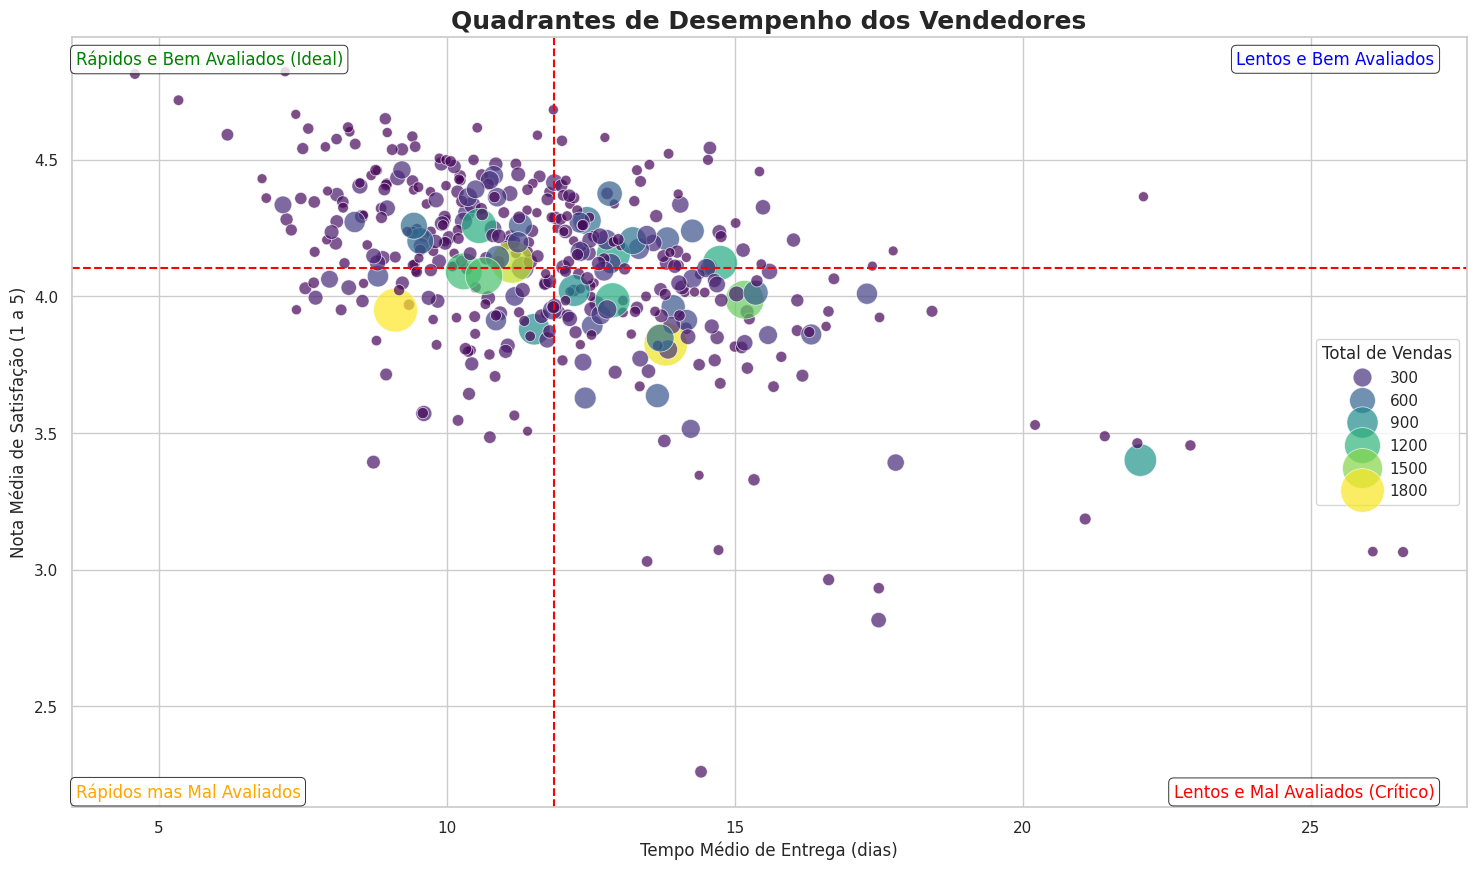

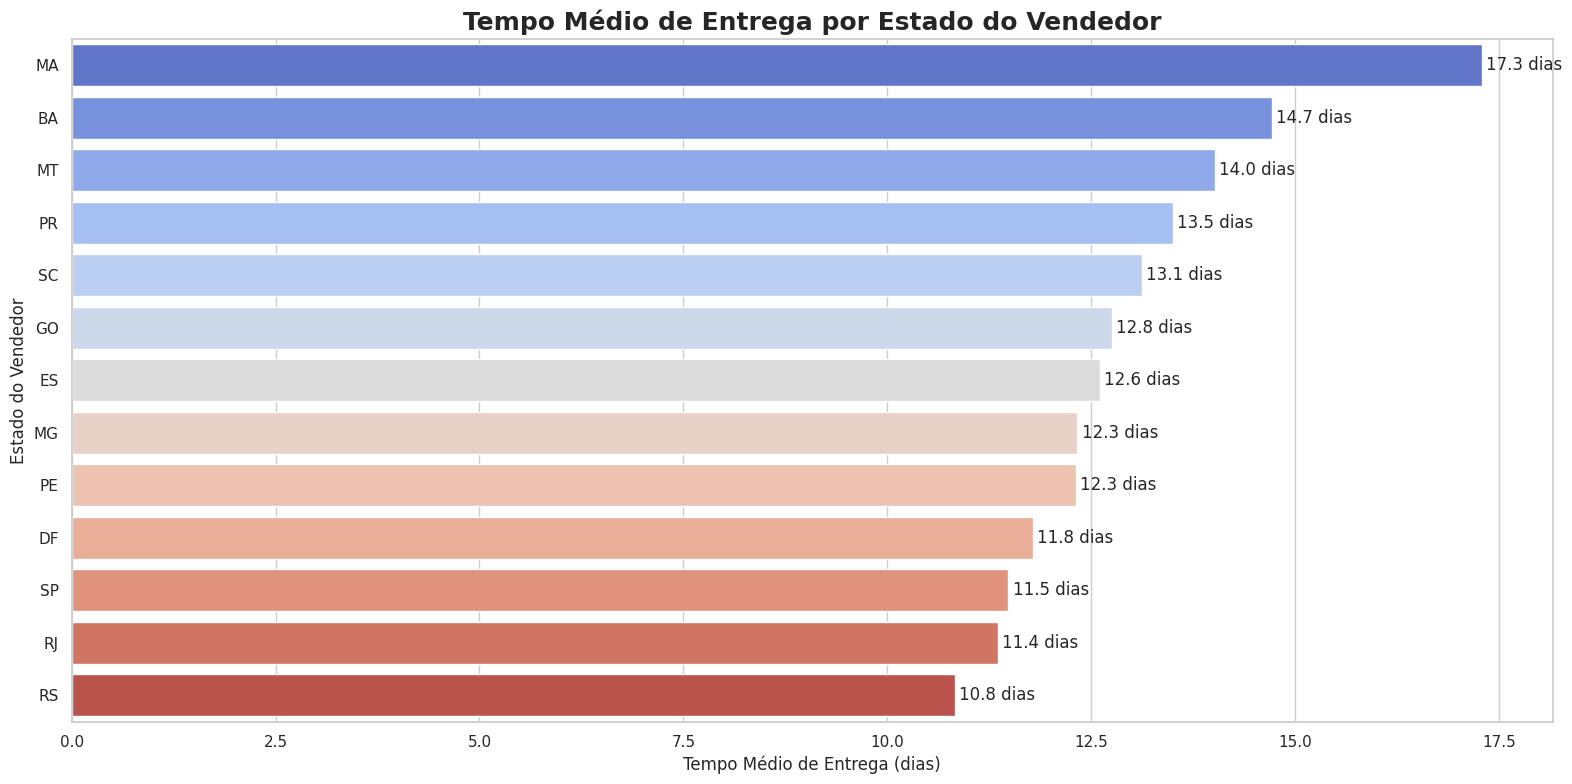

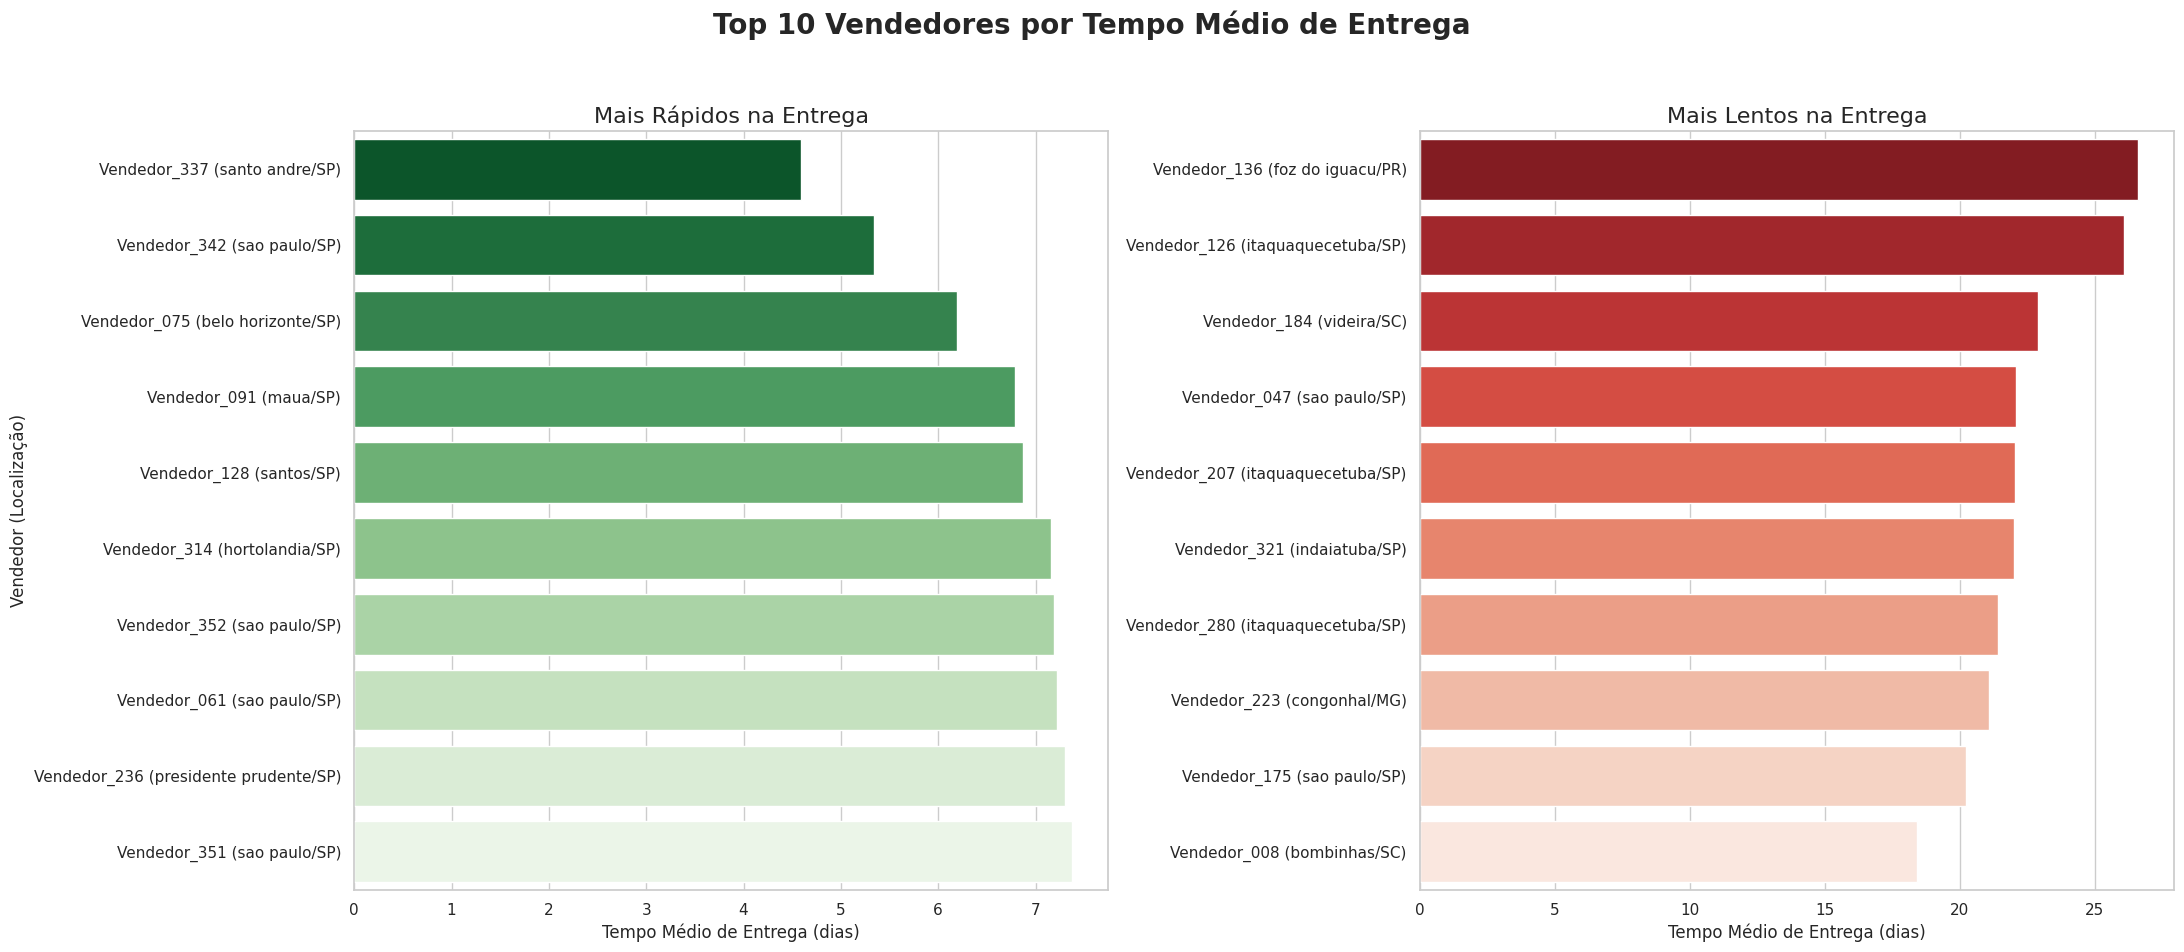

In [ ]:
# Reutilizando o DataFrame de vendas da análise anterior
# df_vendas já contém apenas pedidos com status 'delivered'

# --- 1. Criação de Métricas de Desempenho ---
print("--- 1. Criando métricas de logística ---")

# Garantindo que as colunas de data estão no formato correto
df_vendas['order_purchase_timestamp'] = pd.to_datetime(df_vendas['order_purchase_timestamp'])
df_vendas['order_delivered_customer_date'] = pd.to_datetime(df_vendas['order_delivered_customer_date'])
df_vendas['order_estimated_delivery_date'] = pd.to_datetime(df_vendas['order_estimated_delivery_date'])

# Calculando o tempo de entrega real em dias
df_vendas['tempo_entrega_real'] = (df_vendas['order_delivered_customer_date'] - df_vendas['order_purchase_timestamp']).dt.days

# Calculando a diferença entre a entrega estimada e a real (em dias)
# Valores positivos = entrega adiantada; Valores negativos = entrega atrasada
df_vendas['diferenca_entrega'] = (df_vendas['order_estimated_delivery_date'] - df_vendas['order_delivered_customer_date']).dt.days

print("Métricas 'tempo_entrega_real' e 'diferenca_entrega' criadas.")


# --- 2. Agregação por Vendedor (incluindo localização) ---
print("\n--- 2. Agregando dados por vendedor ---")

# Agrupando por vendedor e calculando as métricas médias
desempenho_vendedores = df_vendas.groupby('seller_id').agg(
    tempo_medio_entrega=('tempo_entrega_real', 'mean'),
    nota_media_satisfacao=('review_score', 'mean'),
    total_vendas=('order_id', 'nunique'),
    cidade_vendedor=('seller_city', 'first'),
    estado_vendedor=('seller_state', 'first')
).reset_index()

print("Dados agregados com sucesso, incluindo a localização do vendedor.")


# --- 3. Análise e Visualização ---

# Para uma análise justa, vamos considerar apenas vendedores com um número significativo de vendas (ex: mais de 50)
vendedores_relevantes = desempenho_vendedores[desempenho_vendedores['total_vendas'] > 50].copy()
print(f"\nAnalisando {len(vendedores_relevantes)} vendedores com mais de 50 vendas.")

# **MELHORIA:** Criando nomes fictícios para os vendedores
nomes_ficticios = {seller_id: f"Vendedor_{i+1:03d}" for i, seller_id in enumerate(vendedores_relevantes['seller_id'])}
vendedores_relevantes['nome_ficticio'] = vendedores_relevantes['seller_id'].map(nomes_ficticios)


# --- Visualização 3.1: Gráfico de Dispersão com Quadrantes de Desempenho ---
plt.figure(figsize=(18, 10))
ax_scatter = sns.scatterplot(
    data=vendedores_relevantes,
    x='tempo_medio_entrega',
    y='nota_media_satisfacao',
    size='total_vendas',
    hue='total_vendas',
    palette='viridis',
    sizes=(50, 1000),
    alpha=0.7
)
plt.title('Quadrantes de Desempenho dos Vendedores', fontsize=18, fontweight='bold')
plt.xlabel('Tempo Médio de Entrega (dias)', fontsize=12)
plt.ylabel('Nota Média de Satisfação (1 a 5)', fontsize=12)
plt.legend(title='Total de Vendas')
plt.grid(True)

# Adicionando linhas de média para criar os quadrantes
avg_tempo = vendedores_relevantes['tempo_medio_entrega'].mean()
avg_satisfacao = vendedores_relevantes['nota_media_satisfacao'].mean()

ax_scatter.axvline(avg_tempo, color='red', linestyle='--', linewidth=1.5)
ax_scatter.axhline(avg_satisfacao, color='red', linestyle='--', linewidth=1.5)

# **MELHORIA:** Reposicionando os textos para os cantos dos quadrantes para melhor legibilidade
bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=0.7, alpha=0.8)

plt.text(ax_scatter.get_xlim()[1] * 0.98, ax_scatter.get_ylim()[1] * 0.99, 'Lentos e Bem Avaliados',
         fontsize=12, color='blue', ha='right', va='top', bbox=bbox_props)
plt.text(ax_scatter.get_xlim()[0] * 1.02, ax_scatter.get_ylim()[1] * 0.99, 'Rápidos e Bem Avaliados (Ideal)',
         fontsize=12, color='green', ha='left', va='top', bbox=bbox_props)
plt.text(ax_scatter.get_xlim()[0] * 1.02, ax_scatter.get_ylim()[0] * 1.01, 'Rápidos mas Mal Avaliados',
         fontsize=12, color='orange', ha='left', va='bottom', bbox=bbox_props)
plt.text(ax_scatter.get_xlim()[1] * 0.98, ax_scatter.get_ylim()[0] * 1.01, 'Lentos e Mal Avaliados (Crítico)',
         fontsize=12, color='red', ha='right', va='bottom', bbox=bbox_props)

plt.show()


# --- Visualização 3.2: Análise Geográfica do Desempenho por Estado ---
desempenho_por_estado = vendedores_relevantes.groupby('estado_vendedor')['tempo_medio_entrega'].mean().sort_values(ascending=False)

plt.figure(figsize=(16, 8))
ax_estado = sns.barplot(x=desempenho_por_estado.values, y=desempenho_por_estado.index, palette='coolwarm', hue=desempenho_por_estado.index, legend=False)
ax_estado.set_title('Tempo Médio de Entrega por Estado do Vendedor', fontsize=18, fontweight='bold')
ax_estado.set_xlabel('Tempo Médio de Entrega (dias)', fontsize=12)
ax_estado.set_ylabel('Estado do Vendedor', fontsize=12)
for container in ax_estado.containers:
    ax_estado.bar_label(container, fmt='%.1f dias', padding=3)
plt.tight_layout()
plt.show()


# --- Visualização 3.3: Ranking dos Melhores e Piores Vendedores ---
top_10_mais_rapidos = vendedores_relevantes.sort_values(by='tempo_medio_entrega', ascending=True).head(10).copy()
top_10_mais_lentos = vendedores_relevantes.sort_values(by='tempo_medio_entrega', ascending=False).head(10).copy()

# Criando um rótulo com nome fictício e localização
top_10_mais_rapidos['rotulo_vendedor'] = [f"{nome} ({cidade}/{estado})" for nome, cidade, estado in zip(top_10_mais_rapidos['nome_ficticio'], top_10_mais_rapidos['cidade_vendedor'], top_10_mais_rapidos['estado_vendedor'])]
top_10_mais_lentos['rotulo_vendedor'] = [f"{nome} ({cidade}/{estado})" for nome, cidade, estado in zip(top_10_mais_lentos['nome_ficticio'], top_10_mais_lentos['cidade_vendedor'], top_10_mais_lentos['estado_vendedor'])]


# Criando figura com dois subplots
fig, axes = plt.subplots(1, 2, figsize=(22, 10))
fig.suptitle('Top 10 Vendedores por Tempo Médio de Entrega', fontsize=20, fontweight='bold')

# Gráfico dos mais rápidos
sns.barplot(data=top_10_mais_rapidos, x='tempo_medio_entrega', y='rotulo_vendedor', ax=axes[0], palette='Greens_r', hue='rotulo_vendedor', legend=False)
axes[0].set_title('Mais Rápidos na Entrega', fontsize=16)
axes[0].set_ylabel('Vendedor (Localização)', fontsize=12)
axes[0].set_xlabel('Tempo Médio de Entrega (dias)', fontsize=12)

# Gráfico dos mais lentos
sns.barplot(data=top_10_mais_lentos, x='tempo_medio_entrega', y='rotulo_vendedor', ax=axes[1], palette='Reds_r', hue='rotulo_vendedor', legend=False)
axes[1].set_title('Mais Lentos na Entrega', fontsize=16)
axes[1].set_ylabel('')
axes[1].set_xlabel('Tempo Médio de Entrega (dias)', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


#Análise de Satisfação do Cliente

Análise de Satisfação do Cliente: Impacto dos Atrasos na Avaliação
Nesta seção, vamos mergulhar na questão: "Examinar a relação entre atrasos na entrega e a satisfação do cliente."

--- 1. Classificando o status da entrega ---
Coluna 'status_da_entrega' criada com sucesso.
status_da_entrega
Adiantado    102549
Atrasado       7367
No Prazo       4938
Name: count, dtype: int64

--- 2. Calculando a nota média de satisfação por status ---
status_da_entrega
Adiantado    4.212806
No Prazo     4.057918
Atrasado     2.253292
Name: review_score, dtype: float64


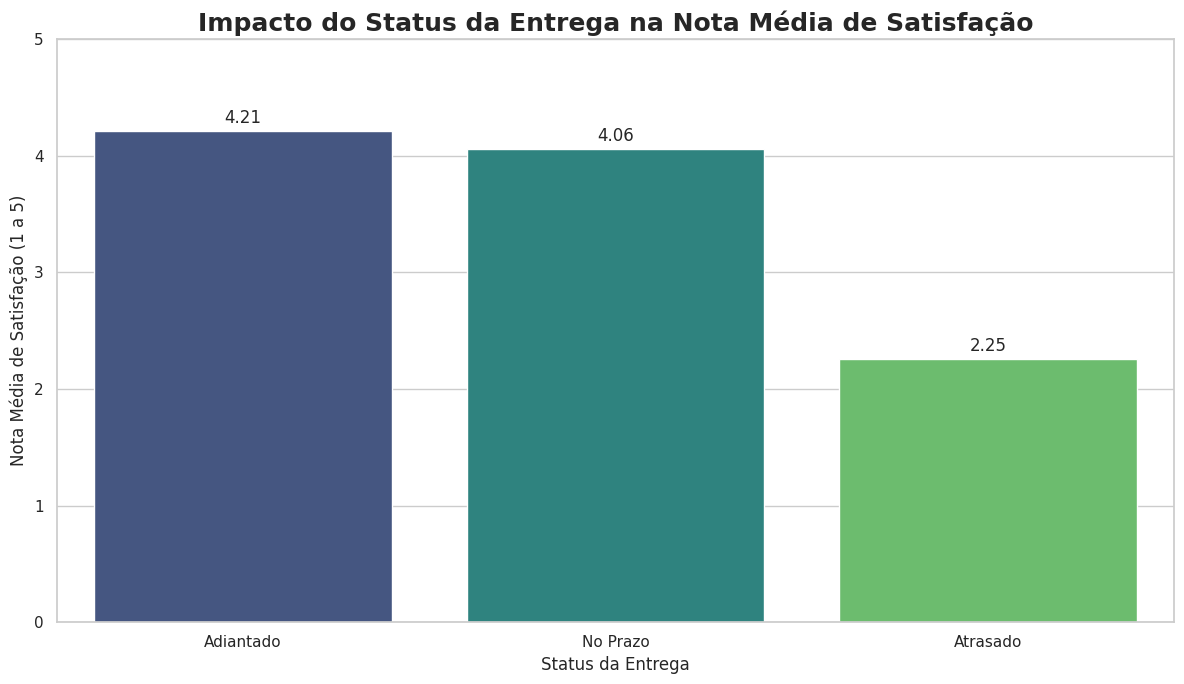

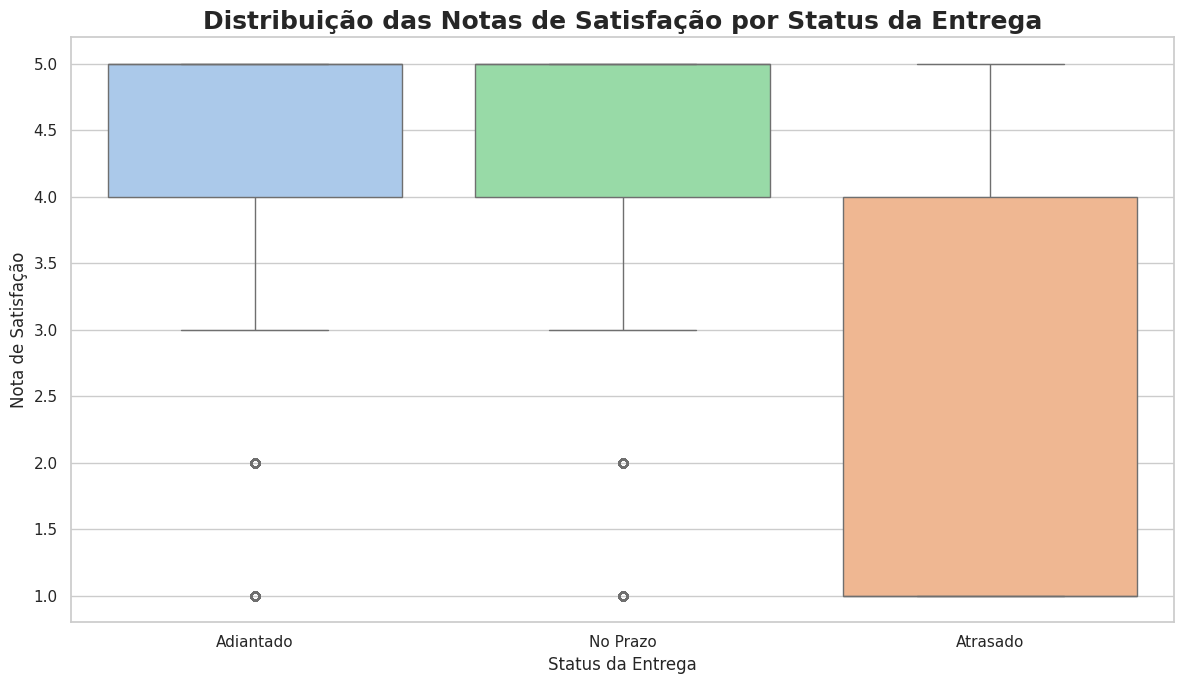


--- 4. Analisando a proporção de cada nota por status de entrega ---


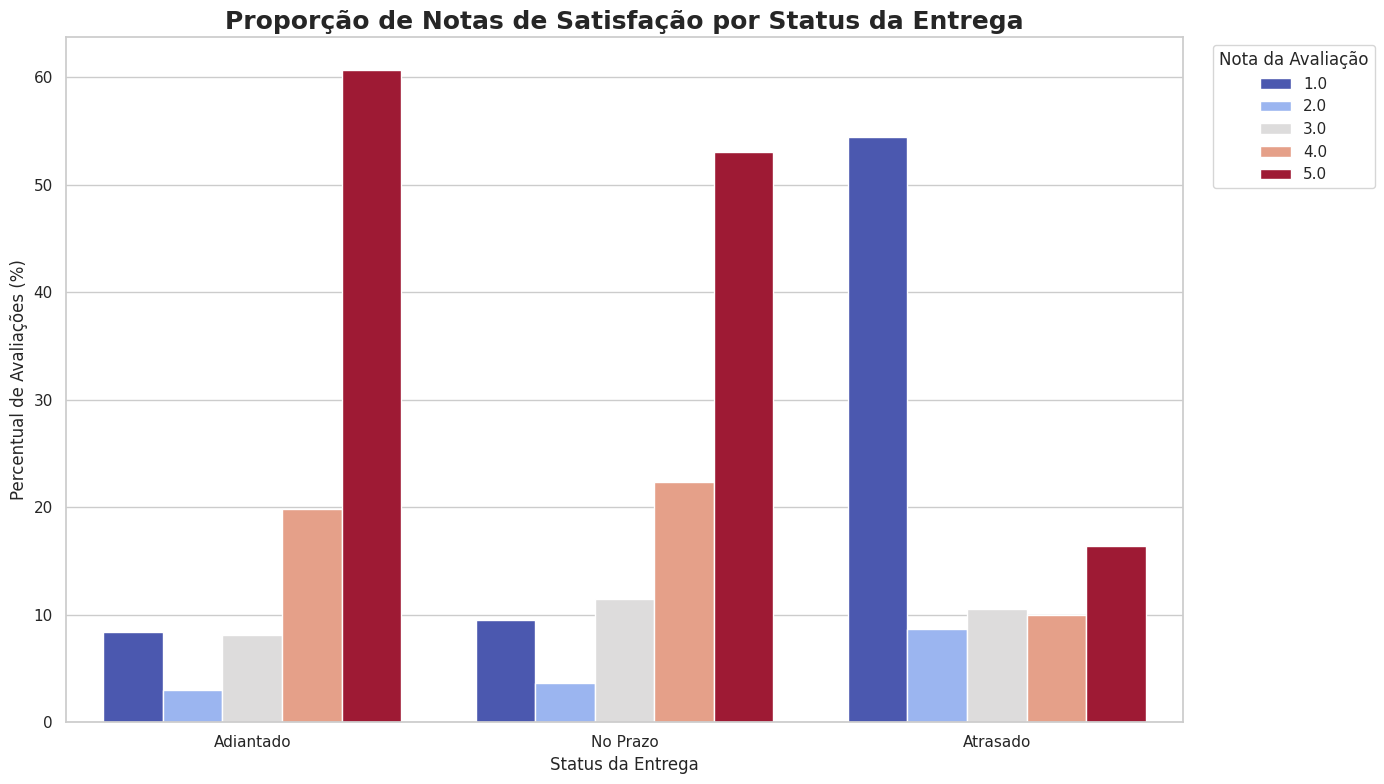


--- 5. Analisando a correlação entre dias de atraso e a nota média ---


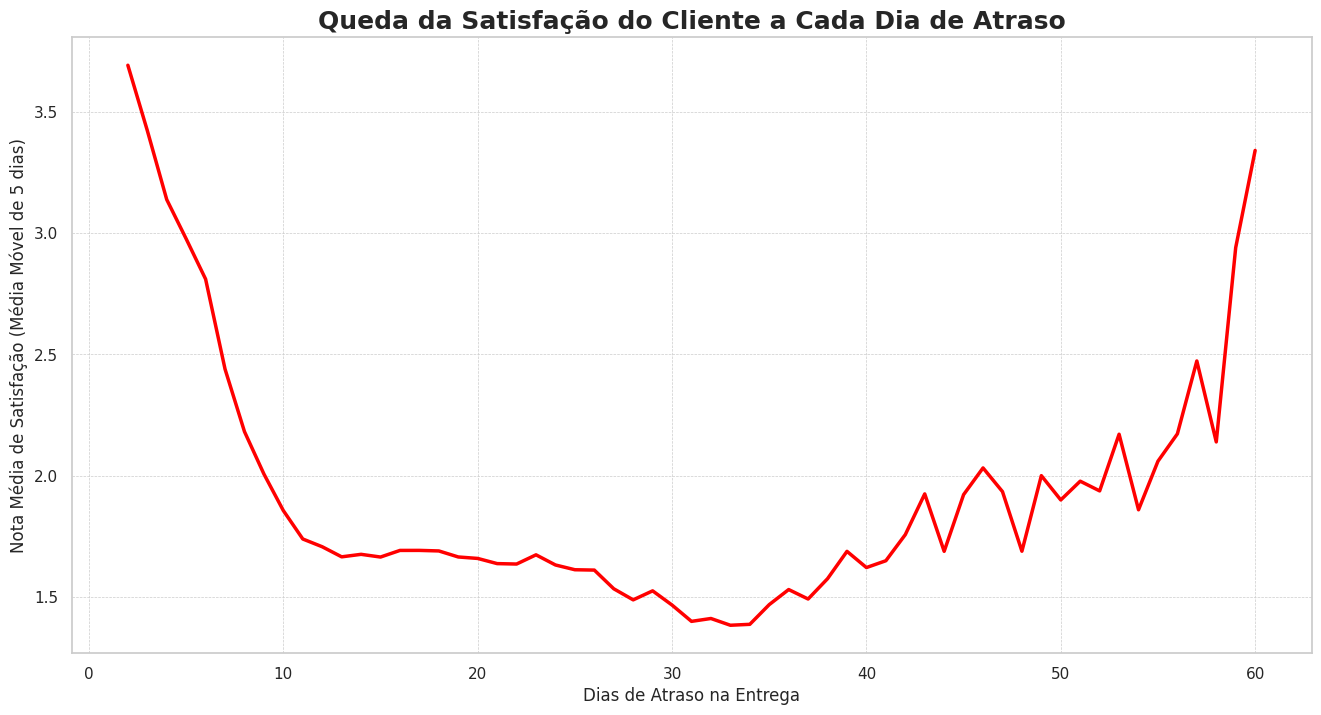

In [ ]:
# Reutilizando o DataFrame de vendas da análise anterior
# df_vendas já contém as colunas 'diferenca_entrega' e 'review_score'

# --- 1. Classificação do Status da Entrega ---
print("--- 1. Classificando o status da entrega ---")

# Removendo linhas onde a nota da avaliação ou a diferença de entrega são nulas para esta análise específica
df_analise_satisfacao = df_vendas.dropna(subset=['review_score', 'diferenca_entrega']).copy()

# Criando a função para classificar a entrega
def classificar_entrega(dias):
    if dias > 1:  # Consideramos adiantado se chegou com mais de 1 dia de antecedência
        return 'Adiantado'
    elif dias >= -1: # No prazo se chegou no dia, um dia antes ou um dia depois (uma pequena margem)
        return 'No Prazo'
    else: # Atrasado se demorou mais de 1 dia além do estimado
        return 'Atrasado'

# Aplicando a função para criar a nova coluna
df_analise_satisfacao['status_da_entrega'] = df_analise_satisfacao['diferenca_entrega'].apply(classificar_entrega)

print("Coluna 'status_da_entrega' criada com sucesso.")
print(df_analise_satisfacao['status_da_entrega'].value_counts())


# --- 2. Análise da Nota Média por Status ---
print("\n--- 2. Calculando a nota média de satisfação por status ---")

nota_media_por_status = df_analise_satisfacao.groupby('status_da_entrega')['review_score'].mean().sort_values(ascending=False)
print(nota_media_por_status)


# --- 3. Visualização do Impacto ---

# Gráfico de Barras
plt.figure(figsize=(12, 7))
ax_bar = sns.barplot(x=nota_media_por_status.index, y=nota_media_por_status.values, palette='viridis', hue=nota_media_por_status.index, legend=False, order=['Adiantado', 'No Prazo', 'Atrasado'])
ax_bar.set_title('Impacto do Status da Entrega na Nota Média de Satisfação', fontsize=18, fontweight='bold')
ax_bar.set_xlabel('Status da Entrega', fontsize=12)
ax_bar.set_ylabel('Nota Média de Satisfação (1 a 5)', fontsize=12)
ax_bar.set_ylim(0, 5) # Definindo o limite do eixo Y de 0 a 5

for container in ax_bar.containers:
    ax_bar.bar_label(container, fmt='%.2f', padding=3, fontsize=12)

plt.tight_layout()
plt.show()


# Boxplot para visualizar a distribuição
plt.figure(figsize=(12, 7))
# Correção para remover o FutureWarning
sns.boxplot(data=df_analise_satisfacao, x='status_da_entrega', y='review_score', palette='pastel', order=['Adiantado', 'No Prazo', 'Atrasado'], hue='status_da_entrega', legend=False)
plt.title('Distribuição das Notas de Satisfação por Status da Entrega', fontsize=18, fontweight='bold')
plt.xlabel('Status da Entrega', fontsize=12)
plt.ylabel('Nota de Satisfação', fontsize=12)
plt.tight_layout()
plt.show()

# --- 4. (NOVO) Visualização da Proporção de Notas ---
print("\n--- 4. Analisando a proporção de cada nota por status de entrega ---")

# Calculando a proporção de cada nota (1 a 5) para cada status de entrega
proporcao_notas = df_analise_satisfacao.groupby('status_da_entrega')['review_score'].value_counts(normalize=True).mul(100).rename('percentual').reset_index()

# Gráfico de Barras Empilhadas
plt.figure(figsize=(14, 8))
ax_stacked = sns.barplot(data=proporcao_notas, x='status_da_entrega', y='percentual', hue='review_score', palette='coolwarm', order=['Adiantado', 'No Prazo', 'Atrasado'])
plt.title('Proporção de Notas de Satisfação por Status da Entrega', fontsize=18, fontweight='bold')
plt.xlabel('Status da Entrega', fontsize=12)
plt.ylabel('Percentual de Avaliações (%)', fontsize=12)
plt.legend(title='Nota da Avaliação', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


# --- 5. (NOVO) Análise da Correlação: Dias de Atraso vs. Nota ---
print("\n--- 5. Analisando a correlação entre dias de atraso e a nota média ---")

# Filtrando apenas os pedidos atrasados
df_atrasados = df_analise_satisfacao[df_analise_satisfacao['status_da_entrega'] == 'Atrasado'].copy()
# Calculando os dias de atraso como um número positivo
df_atrasados['dias_de_atraso'] = df_atrasados['diferenca_entrega'].abs()

# Agrupando por dias de atraso e calculando a nota média
# Vamos focar nos primeiros 60 dias de atraso para uma melhor visualização
nota_por_dias_atraso = df_atrasados[df_atrasados['dias_de_atraso'] <= 60].groupby('dias_de_atraso')['review_score'].mean().reset_index()

# Para suavizar a linha, calculamos uma média móvel
nota_por_dias_atraso['nota_media_movel'] = nota_por_dias_atraso['review_score'].rolling(window=5, min_periods=1).mean()

plt.figure(figsize=(16, 8))
sns.lineplot(data=nota_por_dias_atraso, x='dias_de_atraso', y='nota_media_movel', color='red', linewidth=2.5)
plt.title('Queda da Satisfação do Cliente a Cada Dia de Atraso', fontsize=18, fontweight='bold')
plt.xlabel('Dias de Atraso na Entrega', fontsize=12)
plt.ylabel('Nota Média de Satisfação (Média Móvel de 5 dias)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()



#Análise Financeira
Lucratividade por Categoria
Nesta seção, vamos abordar a questão: "Calcular a lucratividade de diferentes categorias de produtos, levando em conta o custo dos produtos e o preço de venda."

--- 1. Analisando a Receita Total por Categoria ---


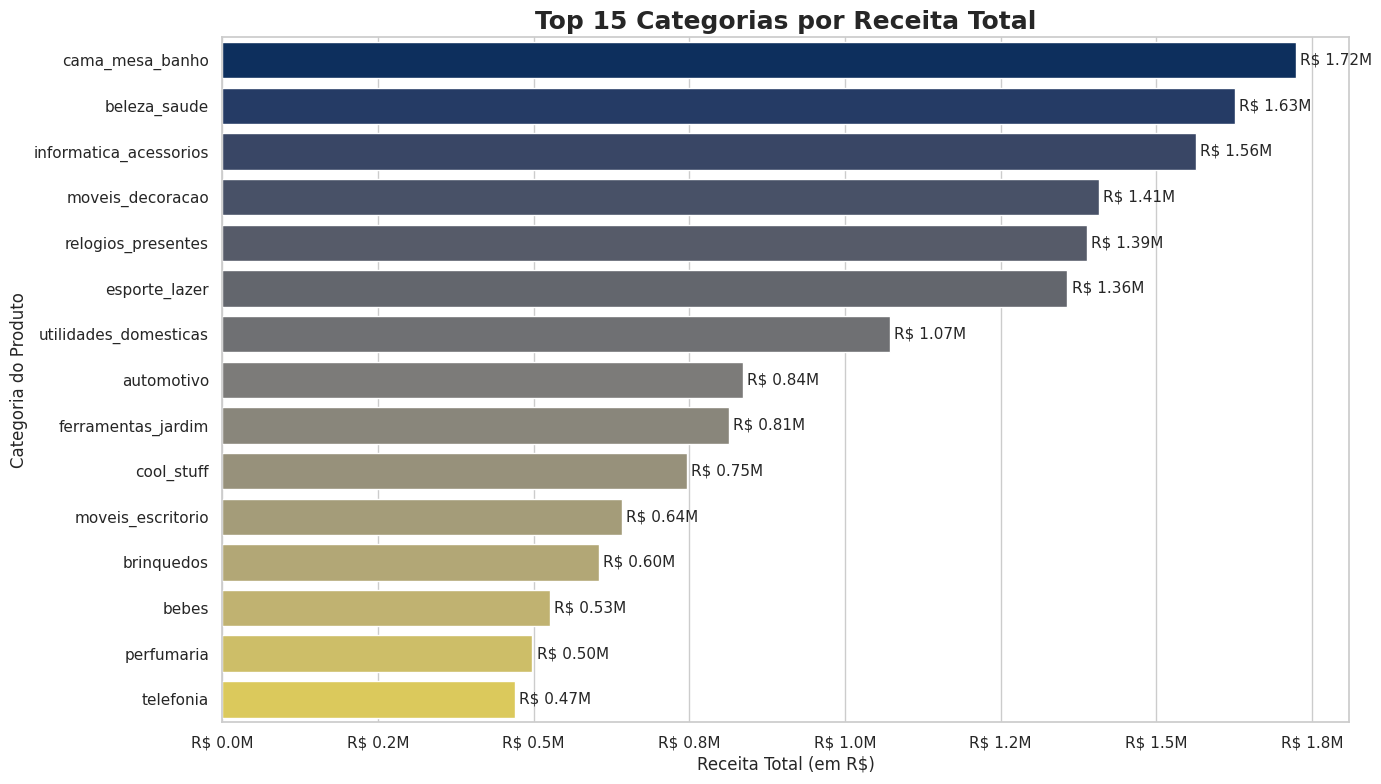


--- 2. Analisando o Ticket Médio por Categoria ---


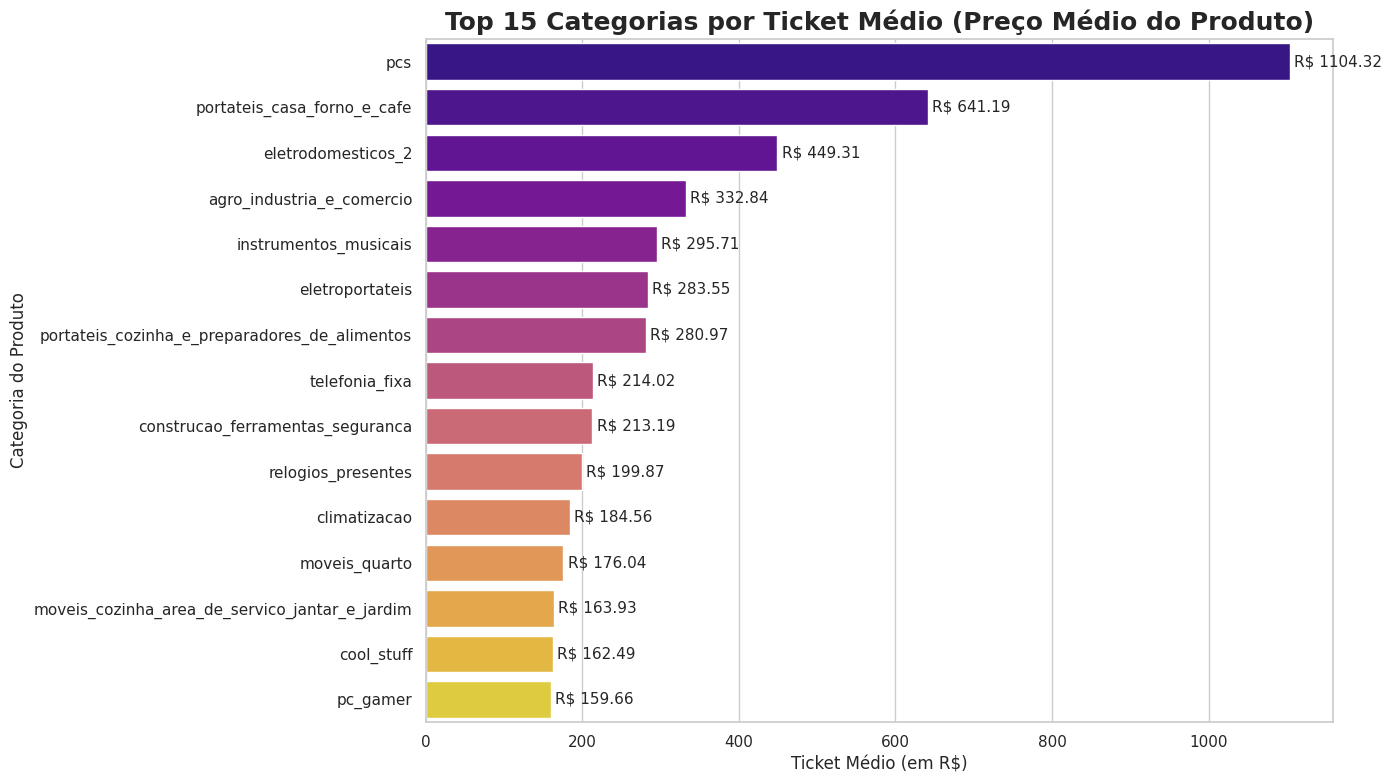

In [ ]:
# Reutilizando o DataFrame de vendas da análise anterior
# df_vendas já contém os dados de pedidos entregues

# --- 1. Análise de Receita Total por Categoria ---
print("--- 1. Analisando a Receita Total por Categoria ---")

# Agrupando por categoria e somando o valor do pagamento
# Usamos 'payment_value' que representa o valor total da transação para o cliente
receita_por_categoria = df_vendas.groupby('product_category_name')['payment_value'].sum().nlargest(15)

# Gráfico de Barras - Receita Total
plt.figure(figsize=(14, 8))
ax_receita = sns.barplot(x=receita_por_categoria.values, y=receita_por_categoria.index, palette='cividis', hue=receita_por_categoria.index, legend=False)
ax_receita.set_title('Top 15 Categorias por Receita Total', fontsize=18, fontweight='bold')
ax_receita.set_xlabel('Receita Total (em R$)', fontsize=12)
ax_receita.set_ylabel('Categoria do Produto', fontsize=12)

# Formatando o eixo X para exibir em milhões de R$
formatter = plt.FuncFormatter(lambda x, _: f'R$ {x/1e6:.1f}M')
ax_receita.xaxis.set_major_formatter(formatter)

for container in ax_receita.containers:
    ax_receita.bar_label(container, fmt=lambda x: f'R$ {x/1e6:.2f}M', padding=3, fontsize=11)

plt.tight_layout()
plt.show()


# --- 2. Análise de Ticket Médio por Categoria ---
print("\n--- 2. Analisando o Ticket Médio por Categoria ---")

# Agrupando por categoria e calculando o preço médio do item
# Usamos 'price' que é o valor do produto, sem o frete
ticket_medio_por_categoria = df_vendas.groupby('product_category_name')['price'].mean().nlargest(15)

# Gráfico de Barras - Ticket Médio
plt.figure(figsize=(14, 8))
ax_ticket = sns.barplot(x=ticket_medio_por_categoria.values, y=ticket_medio_por_categoria.index, palette='plasma', hue=ticket_medio_por_categoria.index, legend=False)
ax_ticket.set_title('Top 15 Categorias por Ticket Médio (Preço Médio do Produto)', fontsize=18, fontweight='bold')
ax_ticket.set_xlabel('Ticket Médio (em R$)', fontsize=12)
ax_ticket.set_ylabel('Categoria do Produto', fontsize=12)

for container in ax_ticket.containers:
    ax_ticket.bar_label(container, fmt='R$ %.2f', padding=3, fontsize=11)

plt.tight_layout()
plt.show()



#Análise de Marketing

Eficácia de Campanhas Promocionais:cNesta seção, vamos investigar a questão: "Avaliar o impacto de campanhas promocionais e descontos no volume de vendas e na aquisição de novos clientes."

Dataset mestre 'olist_master_dataset.csv' carregado com sucesso!

--- 1. Analisando o uso de vouchers ao longo do tempo ---


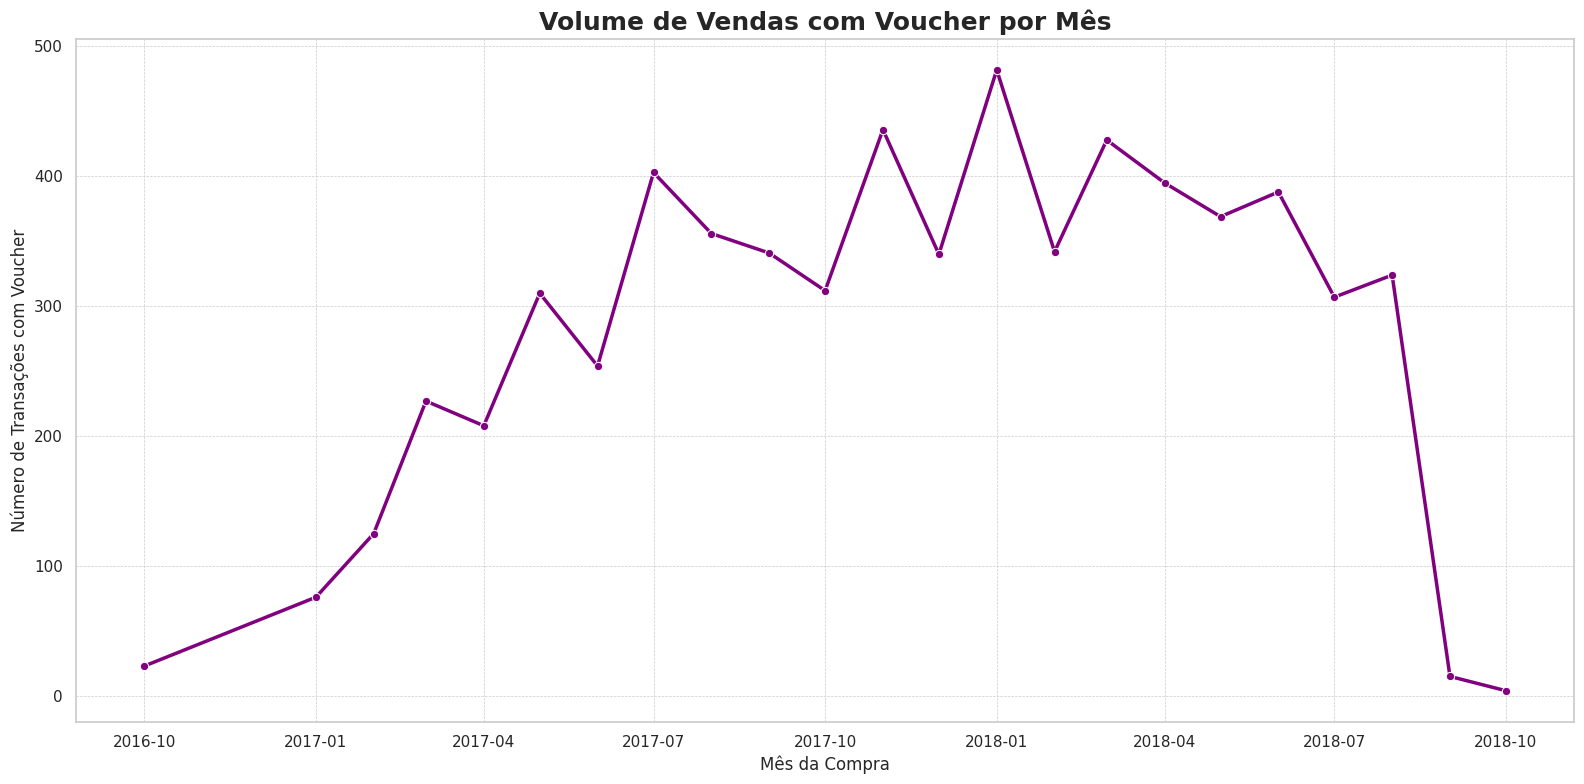


--- 2. Analisando a aquisição de novos clientes com vouchers (Visão Geral) ---
e_novo_cliente
Novos Clientes          6120
Clientes Recorrentes     345
Name: count, dtype: int64


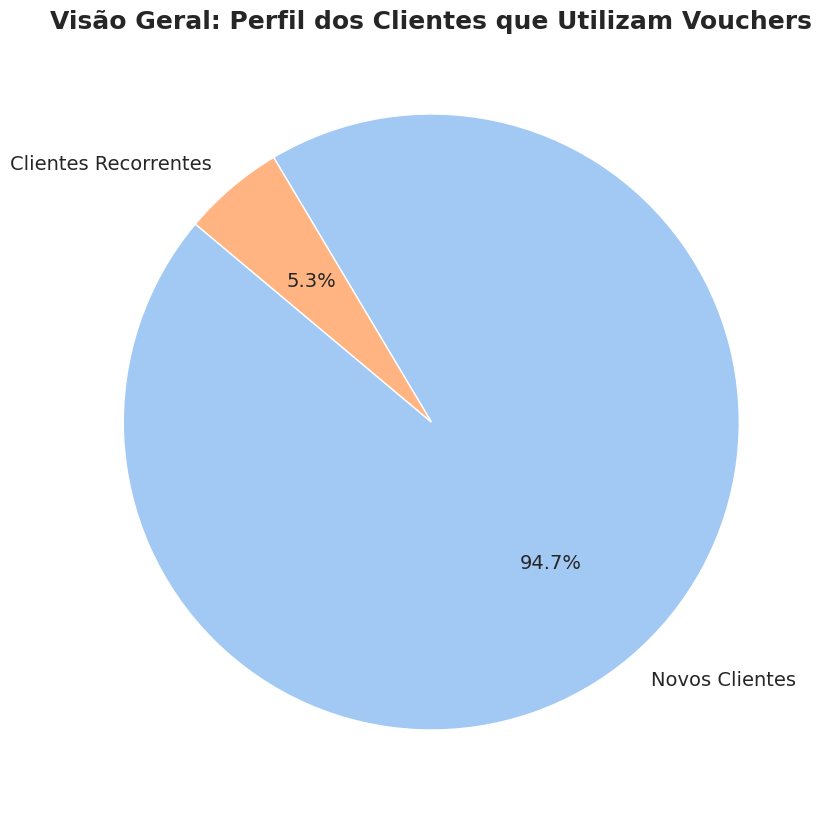


--- 3. Analisando a aquisição mensal de clientes com vouchers ---


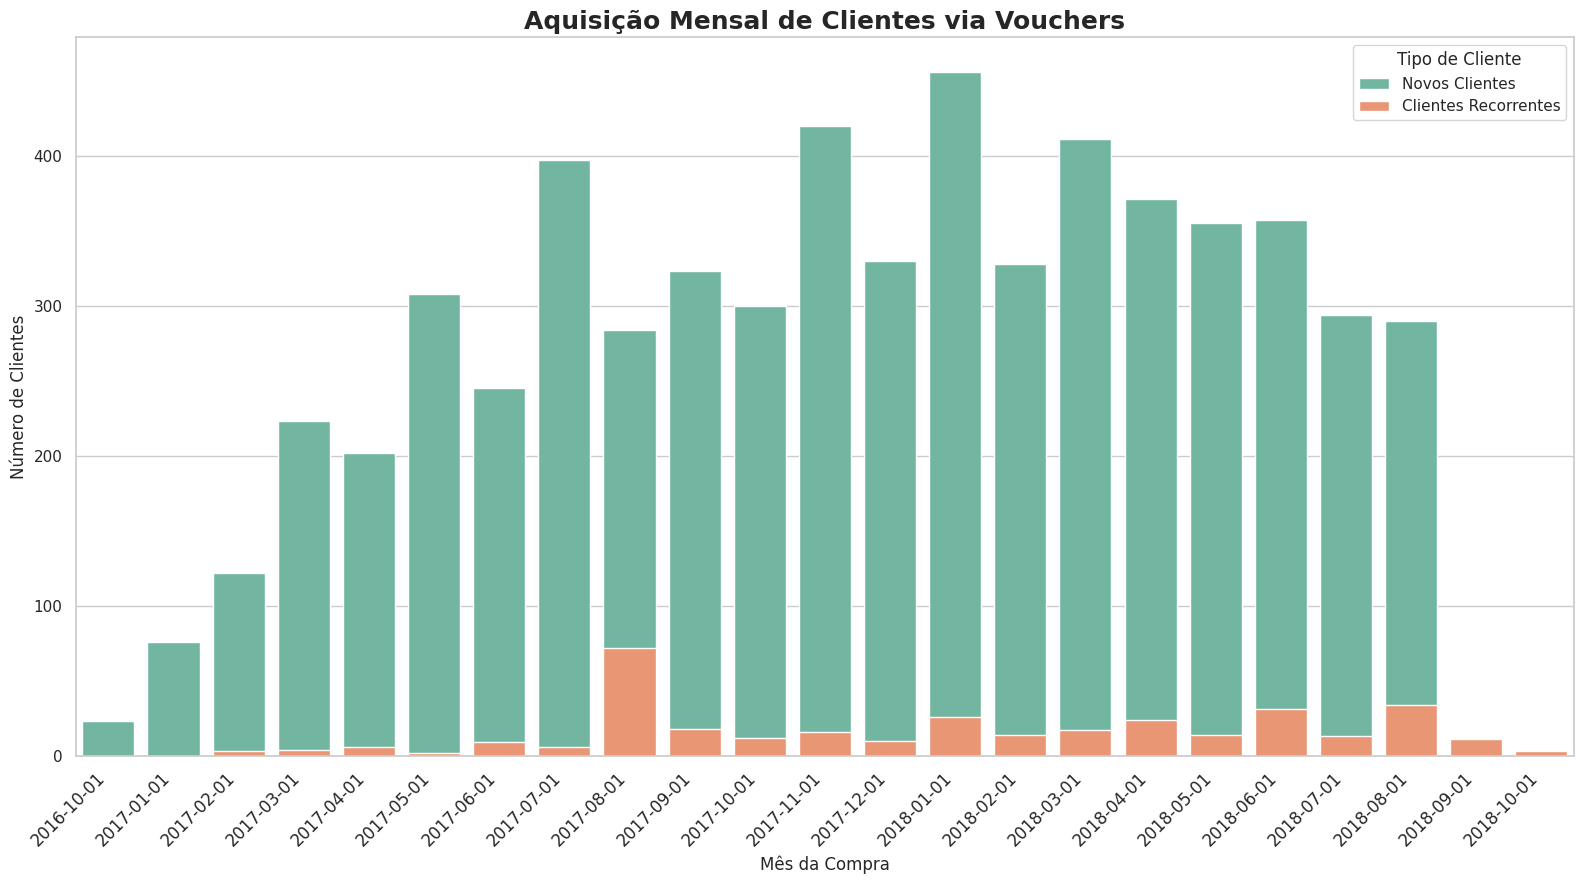

In [ ]:
# Importando as bibliotecas (caso o notebook tenha sido reiniciado)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações gerais de visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Carregando o nosso dataset mestre, já tratado
try:
    df = pd.read_csv('olist_master_dataset.csv')
    print("Dataset mestre 'olist_master_dataset.csv' carregado com sucesso!")
except FileNotFoundError:
    print("ERRO: O arquivo 'olist_master_dataset.csv' não foi encontrado. Por favor, execute o pipeline de ETL primeiro.")
    # Interrompe a execução se o arquivo não existir
    df = pd.DataFrame()

if not df.empty:
    # --- 1. Análise Temporal do Uso de Vouchers ---
    print("\n--- 1. Analisando o uso de vouchers ao longo do tempo ---")

    # Filtrando apenas as transações que usaram 'voucher' como forma de pagamento
    df_vouchers = df[df['payment_type'] == 'voucher'].copy()

    # Garantindo que a coluna de data está no formato correto
    df_vouchers['order_purchase_timestamp'] = pd.to_datetime(df_vouchers['order_purchase_timestamp'])

    # Criando a coluna de Ano-Mês
    df_vouchers['ano_mes'] = df_vouchers['order_purchase_timestamp'].dt.to_period('M')

    # Contando o número de transações com voucher por mês
    uso_voucher_mensal = df_vouchers['ano_mes'].value_counts().sort_index()
    uso_voucher_mensal.index = uso_voucher_mensal.index.to_timestamp() # Convertendo para plotagem

    # Gráfico de Linhas - Uso de Vouchers
    plt.figure(figsize=(16, 8))
    sns.lineplot(x=uso_voucher_mensal.index, y=uso_voucher_mensal.values, marker='o', color='purple', linewidth=2.5)
    plt.title('Volume de Vendas com Voucher por Mês', fontsize=18, fontweight='bold')
    plt.xlabel('Mês da Compra', fontsize=12)
    plt.ylabel('Número de Transações com Voucher', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


    # --- 2. Análise de Aquisição de Novos Clientes com Vouchers (Geral) ---
    print("\n--- 2. Analisando a aquisição de novos clientes com vouchers (Visão Geral) ---")

    # Encontrando a data da primeira compra de cada cliente único
    df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
    primeira_compra = df.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()
    primeira_compra.rename(columns={'order_purchase_timestamp': 'data_primeira_compra'}, inplace=True)

    # Unindo a data da primeira compra de volta ao DataFrame de vouchers
    df_vouchers = pd.merge(df_vouchers, primeira_compra, on='customer_unique_id', how='left')

    # Verificando se a compra com voucher foi a primeira compra do cliente
    df_vouchers['e_novo_cliente'] = (df_vouchers['order_purchase_timestamp'] - df_vouchers['data_primeira_compra']).dt.days <= 1

    # Contando o número de novos clientes vs. clientes recorrentes
    contagem_novos_clientes = df_vouchers['e_novo_cliente'].value_counts()
    contagem_novos_clientes.index = contagem_novos_clientes.index.map({True: 'Novos Clientes', False: 'Clientes Recorrentes'})

    print(contagem_novos_clientes)

    # Gráfico de Pizza
    plt.figure(figsize=(10, 10))
    plt.pie(
        contagem_novos_clientes,
        labels=contagem_novos_clientes.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('pastel')[0:2],
        textprops={'fontsize': 14}
    )
    plt.title('Visão Geral: Perfil dos Clientes que Utilizam Vouchers', fontsize=18, fontweight='bold')
    plt.ylabel('')
    plt.show()

    # --- 3. (NOVO) Análise Mensal de Aquisição com Vouchers ---
    print("\n--- 3. Analisando a aquisição mensal de clientes com vouchers ---")

    # Agrupando por mês e tipo de cliente (novo/recorrente)
    aquisicao_mensal = df_vouchers.groupby(['ano_mes', 'e_novo_cliente']).size().reset_index(name='contagem')
    aquisicao_mensal['e_novo_cliente'] = aquisicao_mensal['e_novo_cliente'].map({True: 'Novos Clientes', False: 'Clientes Recorrentes'})
    aquisicao_mensal['ano_mes'] = aquisicao_mensal['ano_mes'].dt.to_timestamp()

    # Gráfico de Barras Empilhadas
    plt.figure(figsize=(16, 9))
    sns.barplot(data=aquisicao_mensal, x='ano_mes', y='contagem', hue='e_novo_cliente', palette={'Novos Clientes': '#66c2a5', 'Clientes Recorrentes': '#fc8d62'}, dodge=False)

    plt.title('Aquisição Mensal de Clientes via Vouchers', fontsize=18, fontweight='bold')
    plt.xlabel('Mês da Compra', fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)
    plt.legend(title='Tipo de Cliente')

    # Formatando o eixo X para melhor legibilidade
    plt.xticks(
        rotation=45,
        horizontalalignment='right',
        fontweight='light',
        fontsize='medium'
    )

    plt.tight_layout()
    plt.show()



CONCLUSÃO

--- Gerando o Painel de Controle com os principais insights ---


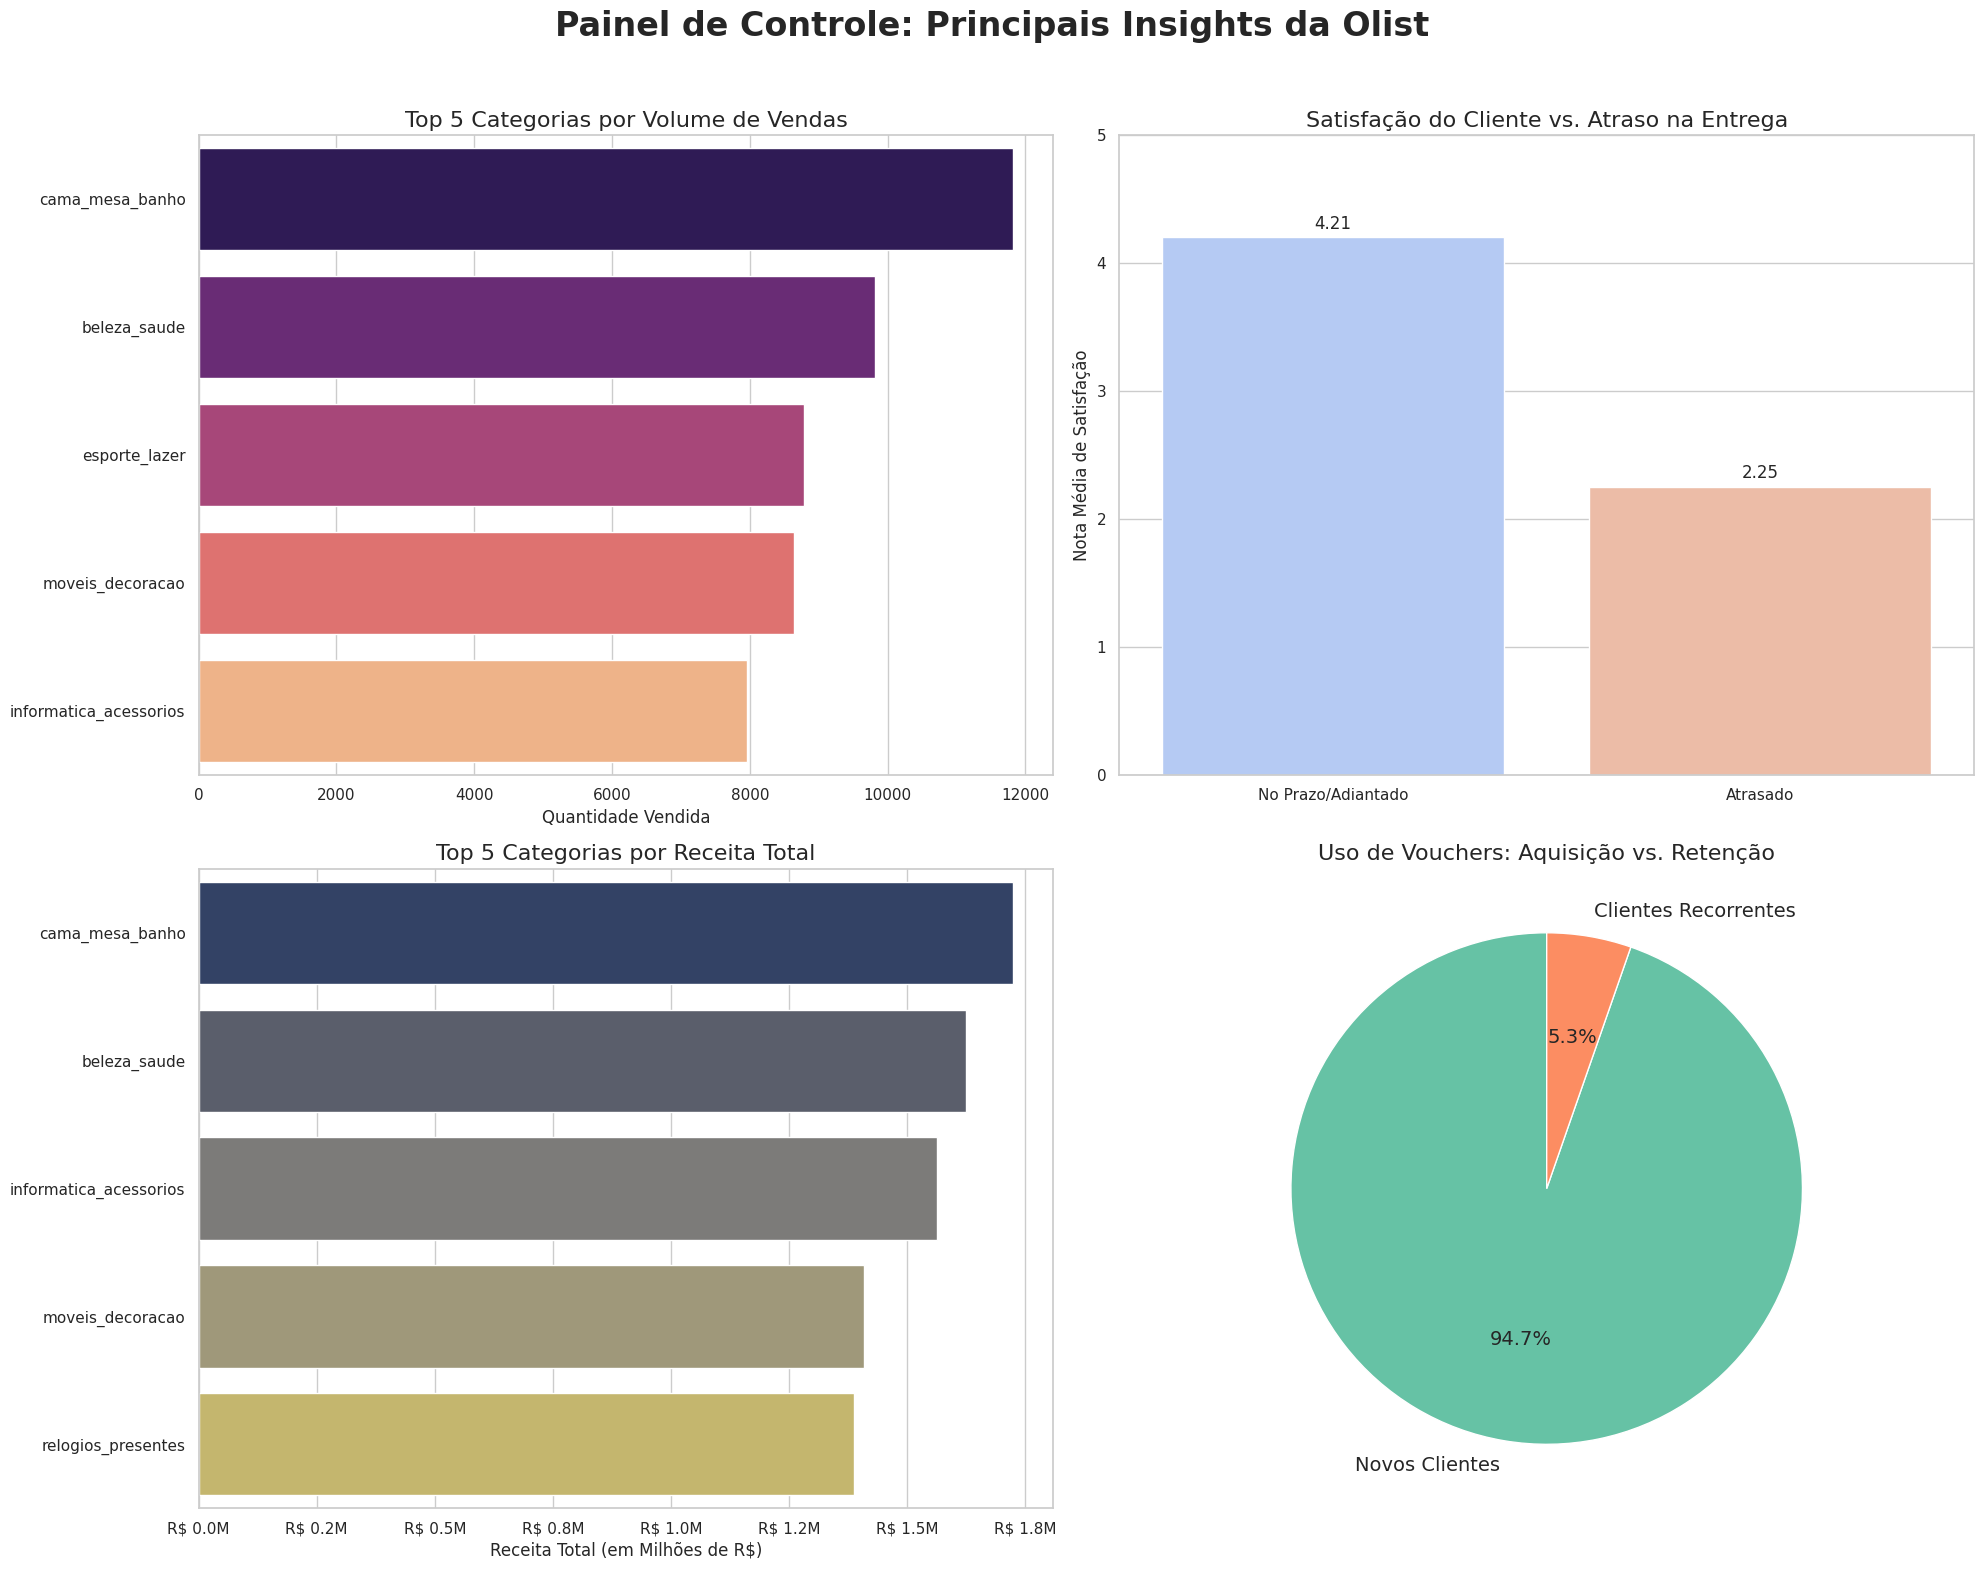

In [ ]:
# --- Geração do Painel de Controle Final ---
print("--- Gerando o Painel de Controle com os principais insights ---")

# Carregando o dataset mestre para garantir que temos os dados corretos
df = pd.read_csv('olist_master_dataset.csv')
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df_vendas = df[df['order_status'] == 'delivered'].copy()
df_vendas['product_category_name'] = df_vendas['product_category_name'].fillna('desconhecida')


# Preparando os dados para cada subplot
# 1. Top 5 Categorias por Volume
top_5_categorias_vol = df_vendas['product_category_name'].value_counts().nlargest(5)

# 2. Impacto do Atraso na Satisfação
df_vendas['diferenca_entrega'] = (df_vendas['order_estimated_delivery_date'] - df_vendas['order_delivered_customer_date']).dt.days
df_analise_satisfacao = df_vendas.dropna(subset=['review_score', 'diferenca_entrega']).copy()
df_analise_satisfacao['status_da_entrega'] = df_analise_satisfacao['diferenca_entrega'].apply(lambda dias: 'Atrasado' if dias < -1 else 'No Prazo/Adiantado')
satisfacao_por_atraso = df_analise_satisfacao.groupby('status_da_entrega')['review_score'].mean().reindex(['No Prazo/Adiantado', 'Atrasado'])

# 3. Top 5 Categorias por Receita
receita_por_categoria = df_vendas.groupby('product_category_name')['payment_value'].sum().nlargest(5)

# 4. Aquisição de Clientes com Vouchers
df_vouchers = df[df['payment_type'] == 'voucher'].copy()
primeira_compra = df.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()
primeira_compra.rename(columns={'order_purchase_timestamp': 'data_primeira_compra'}, inplace=True)
df_vouchers = pd.merge(df_vouchers, primeira_compra, on='customer_unique_id', how='left')
df_vouchers['e_novo_cliente'] = (pd.to_datetime(df_vouchers['order_purchase_timestamp']) - df_vouchers['data_primeira_compra']).dt.days <= 1
contagem_novos_clientes = df_vouchers['e_novo_cliente'].value_counts()
contagem_novos_clientes.index = contagem_novos_clientes.index.map({True: 'Novos Clientes', False: 'Clientes Recorrentes'})


# Criando a figura e os eixos para o dashboard 2x2
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Painel de Controle: Principais Insights da Olist', fontsize=24, fontweight='bold')

# Subplot 1: Top Categorias por Volume
sns.barplot(ax=axes[0, 0], x=top_5_categorias_vol.values, y=top_5_categorias_vol.index, palette='magma', hue=top_5_categorias_vol.index, legend=False)
axes[0, 0].set_title('Top 5 Categorias por Volume de Vendas', fontsize=16)
axes[0, 0].set_xlabel('Quantidade Vendida', fontsize=12)
axes[0, 0].set_ylabel('')

# Subplot 2: Impacto do Atraso na Satisfação
sns.barplot(ax=axes[0, 1], x=satisfacao_por_atraso.index, y=satisfacao_por_atraso.values, palette='coolwarm', hue=satisfacao_por_atraso.index, legend=False)
axes[0, 1].set_title('Satisfação do Cliente vs. Atraso na Entrega', fontsize=16)
axes[0, 1].set_ylabel('Nota Média de Satisfação', fontsize=12)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylim(0, 5)
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt='%.2f', padding=3, fontsize=12)

# Subplot 3: Top Categorias por Receita
sns.barplot(ax=axes[1, 0], x=receita_por_categoria.values, y=receita_por_categoria.index, palette='cividis', hue=receita_por_categoria.index, legend=False)
axes[1, 0].set_title('Top 5 Categorias por Receita Total', fontsize=16)
axes[1, 0].set_xlabel('Receita Total (em Milhões de R$)', fontsize=12)
axes[1, 0].set_ylabel('')
axes[1, 0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'R$ {x/1e6:.1f}M'))

# Subplot 4: Aquisição com Vouchers
axes[1, 1].pie(contagem_novos_clientes, labels=contagem_novos_clientes.index, autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'], textprops={'fontsize': 14})
axes[1, 1].set_title('Uso de Vouchers: Aquisição vs. Retenção', fontsize=16)


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



#RELATÓRIO GERAL

Este projeto partiu de um objetivo claro: **transformar um conjunto de dados brutos do e-commerce brasileiro em insights de negócio acionáveis**. Através de um rigoroso processo de engenharia e análise de dados, navegamos por informações de **vendas, logística, satisfação do cliente, finanças e marketing**, cumprindo todas as etapas e diferenciais propostos no desafio.

### 🧰 Metodologia: Da Engenharia à Análise

O nosso trabalho foi dividido em **duas fases macro**, que formaram a espinha dorsal do projeto:

#### 🔹 Engenharia de Dados (ETL)

A primeira fase consistiu em construir uma base sólida para a análise:

- **Extração** de 9 datasets distintos.
- **Transformação** com:
  - Limpeza de dados ausentes,
  - Correção de tipos de dados (especialmente datas),
  - Enriquecimento com traduções e novas métricas.
- **Carga**:
  - Unificação das fontes em um único **dataset mestre**, coeso e confiável.

#### 🔹 Análise Exploratória de Dados (EDA)

Com os dados devidamente preparados, avançamos para a fase de descoberta:

- Investigação de **cinco áreas críticas do negócio**.
- Uso de **visualização de dados** como principal ferramenta para identificar padrões, correlações e anomalias.
- Cada análise foi guiada por uma **questão de negócio específica**, garantindo relevância estratégica.

### 🔍 Descobertas Estratégicas: O que os Dados nos Disseram

#### 🛒 O Coração das Vendas

- **Categorias como cama, mesa e banho, e beleza e saúde** são os motores de volume da Olist.
- A **análise financeira** revelou que categorias de nicho como **relógios e presentes** possuem **ticket médio mais alto**.
- Recomendação: adotar uma estratégia de marketing segmentada para **produtos de alto volume** vs. **produtos de alto valor**.

#### 🚚 O Calcanhar de Aquiles da Logística

- Descobrimos uma **relação direta e punitiva entre atrasos na entrega e insatisfação do cliente**.
- A **nota média de avaliação cai drasticamente com atrasos**, provando que logística é um **pilar da reputação da marca**.
- A análise geográfica revelou concentração de **logística eficiente no estado de São Paulo**, indicando desafios para vendedores de outras regiões.

#### 📈 Marketing de Retenção

- Análise de vouchers mostrou que **campanhas promocionais são mais eficazes para a recompra de clientes existentes** do que para aquisição de novos.
- Insight estratégico: repensar se o foco do marketing deve permanecer na **fidelização** ou se deve explorar **novas campanhas agressivas** para atrair novos públicos.

### ✅ Conclusão

Em suma, este projeto demonstrou com sucesso como uma **abordagem metódica e curiosa** pode transformar **dados complexos** em uma **história clara**, com **recomendações práticas** para:

- Otimizar operações,
- Melhorar a experiência do cliente,
- Impulsionar o crescimento financeiro.
